In [1]:
%load_ext autoreload
%autoreload 2

# Exploration and visualization generated with `diff-gather-stats` script

This notebook examines results of running the `diff-gather-stats` script,
generated from the [`gather_data.py`](../src/diffannotator/gather_data.py)
source file.

The exploration would involve various open source projects repositories.

The list of different example repositories is taken from the
[GitVision app demo site](https://gitvis.web.app/).

- Large repositories:
  - [TensorFlow](https://github.com/tensorflow/tensorflow): A comprehensive machine learning library by Google<br>
    This repo provides a great example of a large, complex open-source project with a very active community.
  - ...

## TensorFlow repository

This repository was cloned with
```commandline
git clone https://github.com/tensorflow/tensorflow.git
```

### File purposes

> **NOTE:** the file from below should be put in the repository,
> in `data/`, or `data/examples/`, or `notebooks/data/`.

In [2]:
import json
from collections import Counter, defaultdict

import numpy as np
import pandas as pd

The annotation data was generated from the `tensorflow` repository with the following command:
```commandline
diff-annotate from-repo \
    --output-dir=~/example_annotations/tensorflow/ezhulenev/ \
    ~/example_repositories/tensorflow/ \
    --author=ezhulenev@google.com
```

This generates annotations in the "flat" format.

To make them compatibile with "hierarchical" / "bugsinpy" format that `diff-gather-stats` script expects
you need to create `annotation/` directory in each of "bug" directories, and move `*.json` files there:
```commandline
cd ~/example_annotations/tensorflow/ezhulenev/
mkdir annotation
mv *.json annotation/
```

The statistics in `tensorflow.purpose-per-file.json` file were then generated with the following command:
```commandline
diff-gather-stats purpose-per-file \
    ~/example_annotations/tensorflow.purpose-per-file.json \
    ~/example_annotations/tensorflow/
```

```commandline
$ time diff-annotate from-repo \
    --output-dir=~/example_annotations/tensorflow/ezhulenev/ \
    ~/example_repositories/tensorflow/ \
    --author=ezhulenev@google.com
Ensuring that output directory '~/example_annotations/tensorflow/ezhulenev' exists
Generating patches from local Git repo '/home/jnareb/example_repositories/tensorflow'
  using `git log -p '--author=ezhulenev@google.com'`
[...]
commits: 100%|███████████████████████████████████████████████| 1896/1896 [12:56<00:00,  2.44it/s]

real    16m3.873s
user    15m46.088s
sys     0m32.587s
```

Unknown file types:
- `.bazelrc` - UNIX "rc" file (Bazel configuration file, bazelrc) - Unix/Linux config files = unixconfig, linuxconfig: `UnixConfigLexer`
- `*.td` - ~~TableGen code~~ operation definition file for TensorFlow - _unknown to Pygments_, `file` detects as C source
- `*.hlo` - model graphs from ML frameworks defined in StableHLO (HLO = high level operations), from XLA project - _unknown to Pygments_
- `*.hlotxt` - ???
- `*.mlir` - Multi-Level Intermediate Representation - _unknown to Pygments_, `file` detects as C source
- `*.BUILD` - Bazel build file - bazel: `PythonLexer`
- `*.prototxt` - model definition files to train CNN model, used by Caffe, from XLA project - _unknown to Pygments_
- `*.conf` (`apt.conf` i `ld.so.conf`) - configuration files for Apt and for ld.so - _unknown to Pygments_
- `*.files` - file path listing or directory structure listing - _unknown to Pygments_

Timing data gathered:

In [3]:
from_repo_time_df = pd.DataFrame.from_records([
     {'date': '2024-10-04', 'run': 'sequential', 'n_jobs':0, 'log_p [s]': np.nan,  'real [s]': 16*60+3.873, 'user [s]': 15*60+46.088, 'sys [s]': 0*60+32.587},
     {'date': '2024-10-05', 'run': 'sequential', 'n_jobs':0, 'log_p [s]': 187.137, 'real [s]': 16*60+2.935, 'user [s]': 15*60+44.417, 'sys [s]': 33.393},
     {'date': '2024-10-05', 'run': 'joblib', 'n_jobs':2, 'log_p [s]': 186.858, 'real [s]': 38*60+51.947, 'user [s]': 74*60+49.618, 'sys [s]': 5*60+35.264},
     {'date': '2024-10-05', 'run': 'joblib', 'n_jobs':4, 'log_p [s]': 186.968, 'real [s]': 38*60+13.165, 'user [s]': 70*60+30.157, 'sys [s]': 6*60+30.512},
     {'date': '2024-10-05', 'run': 'joblib', 'n_jobs':8, 'log_p [s]': 188.154, 'real [s]': 39*60+ 4.835, 'user [s]': 71*60+19.364, 'sys [s]': 6*60+28.211},
     {'date': '2024-10-05', 'run': 'joblib', 'n_jobs':16,'log_p [s]': 188.410, 'real [s]': 39*60+12.478, 'user [s]': 72*60+10.805, 'sys [s]': 7*60+ 7.176},
     {'date': '2024-10-05', 'run': 'joblib', 'n_jobs':32,'log_p [s]': 203.782, 'real [s]': 39*60+16.548, 'user [s]': 73*60+ 5.825, 'sys [s]': 6*60+54.439},
     {'date': '2024-10-05', 'run': 'joblib', 'n_jobs':64,'log_p [s]': 197.254, 'real [s]': 39*60+58.243, 'user [s]': 73*60+ 0.456, 'sys [s]': 8*60+23.629},
     {'date': '2024-10-05', 'run': 'joblib', 'n_jobs':96,'log_p [s]': 187.538, 'real [s]': 39*60+50.624, 'user [s]': 73*60+28.140, 'sys [s]': 8*60+54.665},
     {'date': '2024-10-05', 'run': 'joblib', 'n_jobs':1, 'log_p [s]': 188.148, 'real [s]': 16*60+ 6.716, 'user [s]': 15*60+49.592, 'sys [s]': 0*60+31.525},
])
from_repo_time_df

,date,run,n_jobs,log_p [s],real [s],user [s],sys [s]
0,2024-10-04,sequential,0,NaN,963.873,946.088,32.587
1,2024-10-05,sequential,0,187.137,962.935,944.417,33.393
2,2024-10-05,joblib,2,186.858,2331.947,4489.618,335.264
3,2024-10-05,joblib,4,186.968,2293.165,4230.157,390.512
4,2024-10-05,joblib,8,188.154,2344.835,4279.364,388.211
5,2024-10-05,joblib,16,188.410,2352.478,4330.805,427.176
6,2024-10-05,joblib,32,203.782,2356.548,4385.825,414.439
7,2024-10-05,joblib,64,197.254,2398.243,4380.456,503.629
8,2024-10-05,joblib,96,187.538,2390.624,4408.140,534.665
9,2024-10-05,joblib,1,188.148,966.716,949.592,31.525


In [4]:
from_repo_time_df.describe()

,n_jobs,log_p [s],real [s],user [s],sys [s]
count,10.000000,9.000000,10.00000,10.000000,10.000000
mean,22.300000,190.472111,1936.13640,3334.446200,309.140100
std,32.836463,5.950285,671.11439,1649.198341,199.123641
min,0.000000,186.858000,962.93500,944.417000,31.525000
25%,1.250000,187.137000,1298.32825,1769.733250,108.860750
50%,6.000000,188.148000,2338.39100,4305.084500,389.361500
75%,28.000000,188.410000,2355.53050,4384.482750,423.991750
max,96.000000,203.782000,2398.24300,4489.618000,534.665000


<Axes: title={'center': 'running time'}, xlabel='n_jobs', ylabel='real [s]'>

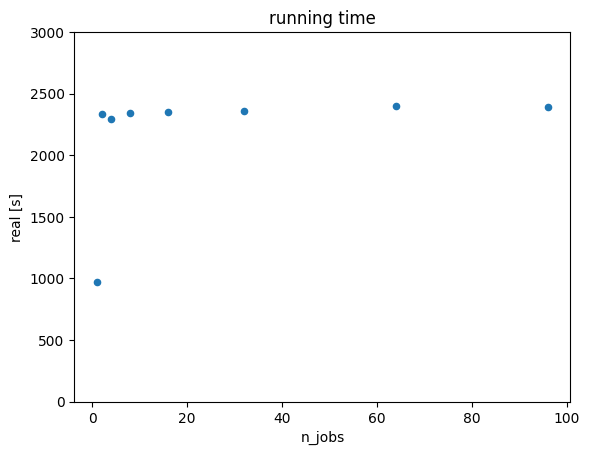

In [5]:
from_repo_time_df[from_repo_time_df['run']=='joblib'].plot.scatter(x='n_jobs', y='real [s]', ylim=(0,50*60), title='running time')

```commandline
$ time diff-gather-stats --annotations-dir='' \
    purpose-per-file \
    ~/example_annotations/tensorflow.purpose-per-file.json \
    ~/example_annotations/tensorflow/
Dataset /home/jnareb/example_annotations/tensorflow/
[...]
100%|██████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.76s/it]
Saving results to '/home/jnareb/example_annotations/tensorflow.purpose-per-file.json' JSON file

real    0m2.429s
user    0m9.358s
sys     0m0.133s
```


In [6]:
with open('/home/jnareb/example_annotations/tensorflow.purpose-per-file.json', mode='r') as json_fp:
    tf_ezhulenev_per_file_data = json.load(json_fp)

In [7]:
#tf_ezhulenev_per_file_data

In [8]:
# There is only one "dataset", and only one "bug"
annotations_prefix = '/home/jnareb/example_annotations/'
ezhulenev_per_file_data = tf_ezhulenev_per_file_data[f'{annotations_prefix}tensorflow']['ezhulenev']

ezhulenev_records = []
for patch_name, patch_data in ezhulenev_per_file_data.items():
    for file_name, purposes in patch_data.items():
        if file_name == '/dev/null':
            continue

        record = {
            'patchname': patch_name.removesuffix('.json'),
            'filename': file_name,
        }
        purpose_counter = Counter()
        
        for p in purposes:
            purpose_counter[p] += 1

        record.update(dict(purpose_counter))

        ezhulenev_records.append(record)

In [9]:
# show example
ezhulenev_records[:10]

[{'patchname': '185a326927da6e1d5ca8dbb8506d4d353780bd2e',
  'filename': 'tensorflow/workspace.bzl',
  'programming': 1},
 {'patchname': 'cdd37b886e0ac509320fc7391f9f1ac922c06454',
  'filename': 'third_party/xla/xla/service/cpu/benchmarks/BUILD',
  'project': 1},
 {'patchname': 'cdd37b886e0ac509320fc7391f9f1ac922c06454',
  'filename': 'third_party/xla/xla/service/cpu/benchmarks/optimizer_benchmark_test.cc',
  'test': 1},
 {'patchname': '286e7d4b24b4235ca71027b1a68d5619e1c70d8a',
  'filename': 'third_party/xla/xla/service/cpu/BUILD',
  'project': 1},
 {'patchname': '286e7d4b24b4235ca71027b1a68d5619e1c70d8a',
  'filename': 'third_party/xla/xla/service/cpu/dot_op_emitter.cc',
  'programming': 1},
 {'patchname': '286e7d4b24b4235ca71027b1a68d5619e1c70d8a',
  'filename': 'third_party/xla/xla/service/cpu/dot_op_emitter.h',
  'programming': 1},
 {'patchname': '286e7d4b24b4235ca71027b1a68d5619e1c70d8a',
  'filename': 'third_party/xla/xla/service/cpu/mlir_emitter.cc',
  'programming': 1},
 {'pat

> **NOTE:** imports should be moved to the preamble, or at the top of notebook

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

In [11]:
# debug
pd.DataFrame.from_dict({'idx_1': {'col_1': 1, 'col_2': 2}, 'idx_2': {'col_1': 11, 'col_2': 22}}, orient='index')

,col_1,col_2
idx_1,1,2
idx_2,11,22


In [12]:
ezhulenev_df = pd.DataFrame.from_records(ezhulenev_records).fillna(0).convert_dtypes()

In [13]:
ezhulenev_df

,patchname,filename,programming,project,test,other,data,documentation,markup
0,185a326927da6e1d5ca8dbb8506d4d353780bd2e,tensorflow/workspace.bzl,1,0,0,0,0,0,0
1,cdd37b886e0ac509320fc7391f9f1ac922c06454,third_party/xla/xla/service/cpu/benchmarks/BUILD,0,1,0,0,0,0,0
2,cdd37b886e0ac509320fc7391f9f1ac922c06454,third_party/xla/xla/service/cpu/benchmarks/opt...,0,0,1,0,0,0,0
3,286e7d4b24b4235ca71027b1a68d5619e1c70d8a,third_party/xla/xla/service/cpu/BUILD,0,1,0,0,0,0,0
4,286e7d4b24b4235ca71027b1a68d5619e1c70d8a,third_party/xla/xla/service/cpu/dot_op_emitter.cc,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
10196,1a6ed44670279ff61e9d984067127acf5704344f,third_party/xla/xla/stream_executor/gpu/gpu_dr...,1,0,0,0,0,0,0
10197,1a6ed44670279ff61e9d984067127acf5704344f,third_party/xla/xla/stream_executor/gpu/gpu_ex...,1,0,0,0,0,0,0
10198,1a6ed44670279ff61e9d984067127acf5704344f,third_party/xla/xla/stream_executor/gpu/gpu_ty...,1,0,0,0,0,0,0
10199,1a6ed44670279ff61e9d984067127acf5704344f,third_party/xla/xla/stream_executor/stream_exe...,1,0,0,0,0,0,0


#### Numbers and hist, per commit

In [14]:
ezhulenev_per_commit_df = ezhulenev_df.groupby('patchname')[['programming','data','test','project','documentation','markup','other']].sum()
ezhulenev_per_commit_df

,programming,data,test,project,documentation,markup,other
patchname,,,,,,,
0024f5d08dff98bd78ed48f5a46226d048583be7,3,0,0,1,0,0,0
003ab23a4dfc645eb9d41b9d0fc0c98a8ca3b73d,5,0,0,0,0,0,0
00652e6e6a0ffb9c60a21ac91680bc1ac5528bc4,22,0,0,2,0,0,0
0071c1738eb5248fe9993bc7e437fa63e3a17742,1,0,0,0,0,0,0
007eb8a5b793ecbaa648b2e894df4f4c846a6156,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
ff3da2b31150f2dca37cfa1aff72418c6a89550f,1,0,0,0,0,0,0
ff3db2d32584175c67c11a2be36b54170bae473d,1,0,1,0,0,0,0
ffac1f66df235e8876d1140d2b37af6cc80ed890,4,0,0,0,0,0,0


In [15]:
ezhulenev_per_commit_df.describe()

,programming,data,test,project,documentation,markup,other
count,1896.0,1896.0,1896.0,1896.0,1896.0,1896.0,1896.0
mean,3.555907,0.026899,0.9673,0.702532,0.017405,0.000527,0.109705
std,6.458885,0.204988,2.752017,1.207328,0.159858,0.022966,0.47479
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,2.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,4.0,0.0,1.0,1.0,0.0,0.0,0.0
max,128.0,5.0,63.0,13.0,4.0,1.0,6.0


In [16]:
ezhulenev_per_commit_df.sum()

programming      6742
data               51
test             1834
project          1332
documentation      33
markup              1
other             208
dtype: Int64

In [17]:
ezhulenev_per_commit_df.idxmax()

programming      fa114c7950632ef6f7800bfa5f9b95cbc3ea8577
data             65fd4e5b5d4c127ea46d90aaf38ebe32e57e80a8
test             05fff776d9069d1d19eaf5c9859770328ed143ea
project          cf5e85663fef097f83f5004f112ae42758e9b035
documentation    dd5b364dc0a6b994e678c2f2a9ea01771462d5e5
markup           9c20fbff6c251b05c15f2b4f840722c78bf38233
other            193470c58fa10e66c87aadc47a446f14913be10b
dtype: string

In [18]:
# sanity check for idxmax for 'project' files
ezhulenev_per_file_data['cf5e85663fef097f83f5004f112ae42758e9b035.json']

{'tensorflow/c/experimental/stream_executor/BUILD': ['project'],
 'tensorflow/python/BUILD': ['project'],
 'third_party/xla/xla/backends/interpreter/BUILD': ['project'],
 'third_party/xla/xla/client/BUILD': ['project'],
 'third_party/xla/xla/mlir/backends/gpu/BUILD': ['project'],
 'third_party/xla/xla/service/BUILD': ['project'],
 'third_party/xla/xla/service/cpu/BUILD': ['project'],
 'third_party/xla/xla/service/gpu/tests/BUILD': ['test'],
 'third_party/xla/xla/stream_executor/BUILD': ['project'],
 'third_party/xla/xla/stream_executor/cuda/BUILD': ['project'],
 'third_party/xla/xla/stream_executor/gpu/BUILD': ['project'],
 'third_party/xla/xla/stream_executor/host/BUILD': ['project'],
 'third_party/xla/xla/stream_executor/rocm/BUILD': ['project'],
 'third_party/xla/xla/translate/mhlo_to_lhlo_with_xla/BUILD': ['project'],
 'third_party/xla/xla/xla.bzl': ['programming']}

In [19]:
# sanity check for idxmax for 'markup' files
ezhulenev_per_file_data['9c20fbff6c251b05c15f2b4f840722c78bf38233.json']

{'tensorflow/compiler/mlir/lite/tf_tfl_passes.cc': ['programming'],
 'tensorflow/compiler/mlir/lite/transforms/quantize_patterns.td': ['other'],
 'tensorflow/compiler/mlir/tensorflow/ir/tf_ops.td': ['other'],
 'tensorflow/compiler/mlir/tensorflow/ir/tf_ops_a_m.cc': ['programming'],
 'tensorflow/compiler/mlir/tensorflow/ir/tf_ops_helpers.inc': ['markup'],
 'tensorflow/compiler/mlir/tensorflow/tests/canonicalize.mlir': ['test'],
 'tensorflow/compiler/mlir/tensorflow/tests/tf_saved_model/control_flow_upgrade_legacy_v1.py': ['test']}

In [20]:
ezhulenev_per_commit_df.replace(0, np.nan).median()

programming      2.0
data             1.0
test             1.0
project          1.0
documentation    1.0
markup           1.0
other            1.0
dtype: Float64

<Axes: ylabel='Frequency'>

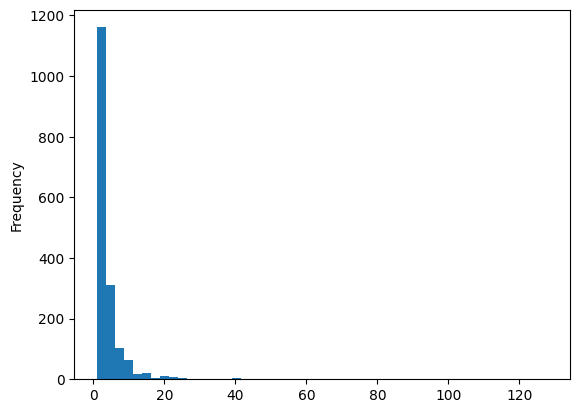

In [21]:
plt.figure();

ezhulenev_per_commit_df['programming'].replace(0, np.nan).plot.hist(bins=50)

<Axes: ylabel='Frequency'>

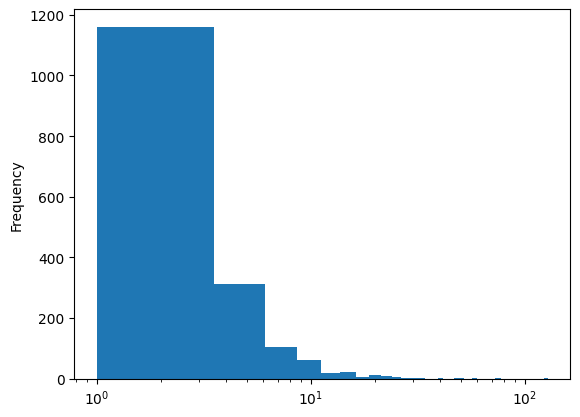

In [22]:
plt.figure();

ezhulenev_per_commit_df['programming'].replace(0, np.nan).plot.hist(bins=50, logx=True)

<Axes: ylabel='Frequency'>

<Figure size 640x480 with 0 Axes>

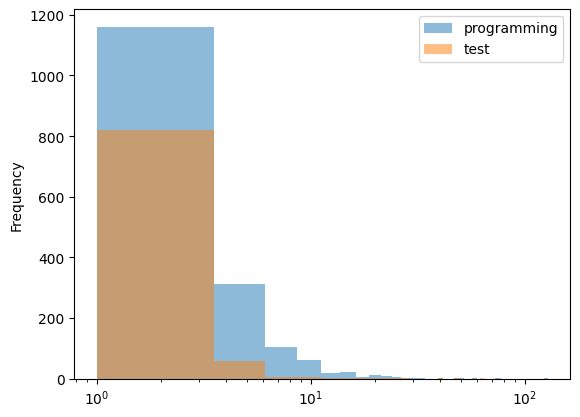

In [23]:
plt.figure();

ezhulenev_per_commit_df[['programming', 'test']].replace(0, np.nan).plot.hist(bins=50, logx=True, alpha=0.5)

<Axes: ylabel='Density'>

<Figure size 640x480 with 0 Axes>

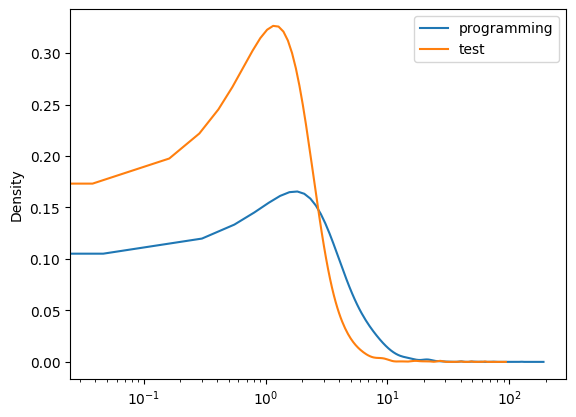

In [24]:
plt.figure();

ezhulenev_per_commit_df[['programming', 'test']].replace(0, np.nan).plot.kde(logx=True)  # not filled

<Axes: ylabel='Density'>

<Figure size 640x480 with 0 Axes>

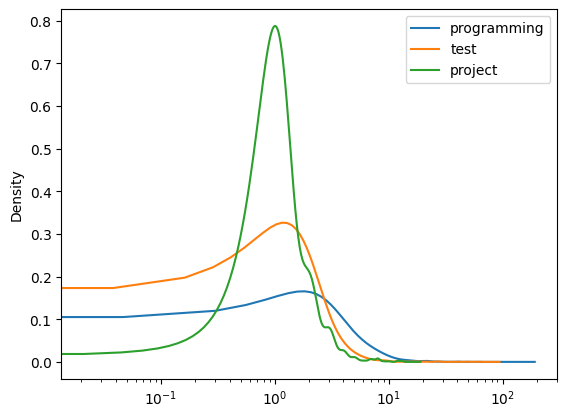

In [25]:
plt.figure();

ezhulenev_per_commit_df[['programming', 'test', 'project']].replace(0, np.nan).plot.kde(logx=True)  # not filled

<Axes: ylabel='Frequency'>

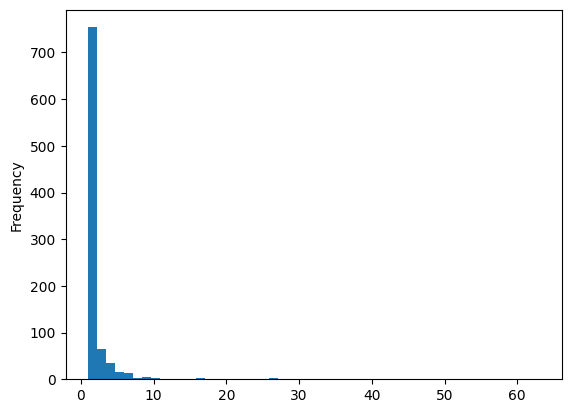

In [26]:
ezhulenev_per_commit_df['test'].replace(0, np.nan).plot.hist(bins=50)

<Axes: ylabel='Frequency'>

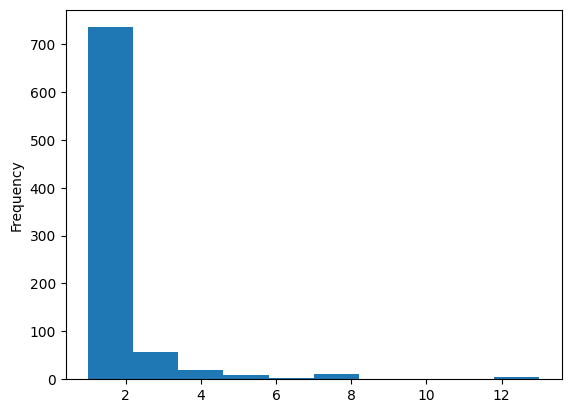

In [27]:
ezhulenev_per_commit_df['project'].replace(0, np.nan).plot.hist()

#### Split between categories, per commit

<Axes: >

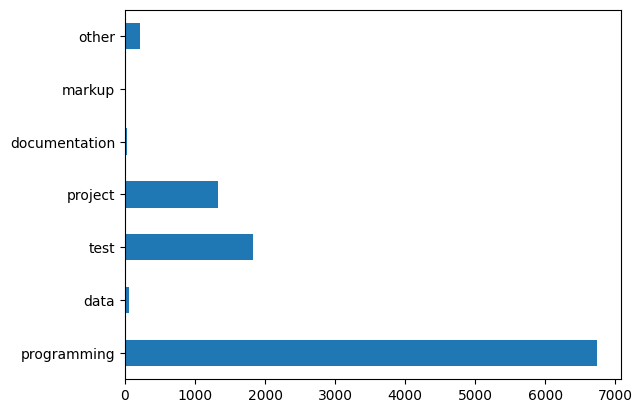

In [28]:
ezhulenev_per_commit_df[['programming','data','test','project','documentation','markup','other']].sum().plot.barh()

In [29]:
ezhulenev_per_commit_df['programming or test'] = (ezhulenev_per_commit_df['programming'] > 0) | (ezhulenev_per_commit_df['test'] > 0)
ezhulenev_per_commit_df['programming > 0'] = ezhulenev_per_commit_df['programming'] > 0
ezhulenev_per_commit_df['test > 0'] = ezhulenev_per_commit_df['test'] > 0
ezhulenev_per_commit_df['programming >= test'] = ezhulenev_per_commit_df['programming'] >= ezhulenev_per_commit_df['test']
ezhulenev_per_commit_df['programming < test'] = ezhulenev_per_commit_df['programming'] < ezhulenev_per_commit_df['test']

In [30]:
ezhulenev_per_commit_df['programming, no test'] = (ezhulenev_per_commit_df['programming'] > 0) & (ezhulenev_per_commit_df['test'] == 0)
ezhulenev_per_commit_df['test, no programming'] = (ezhulenev_per_commit_df['programming'] == 0) & (ezhulenev_per_commit_df['test'] > 0)
ezhulenev_per_commit_df['programming < test && programming'] = ezhulenev_per_commit_df['programming < test'] & ezhulenev_per_commit_df['programming > 0']
ezhulenev_per_commit_df['programming >= test && test'] = ezhulenev_per_commit_df['programming >= test'] & ezhulenev_per_commit_df['test > 0']

In [31]:
ezhulenev_per_commit_df[['programming or test', 'programming > 0', 'test > 0', 'programming >= test', 'programming < test']].sum()

programming or test    1836
programming > 0        1720
test > 0                903
programming >= test    1698
programming < test      198
dtype: Int64

In [32]:
ezhulenev_per_commit_df.shape

(1896, 16)

In [33]:
ezhulenev_per_commit_df[ezhulenev_per_commit_df['programming or test']][['programming or test', 'programming > 0', 'test > 0', 'programming < test']].sum()

programming or test    1836
programming > 0        1720
test > 0                903
programming < test      198
dtype: Int64

<Axes: >

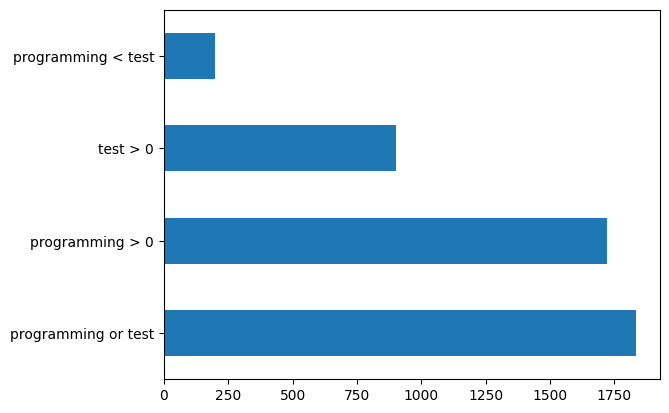

In [34]:
ezhulenev_per_commit_df[ezhulenev_per_commit_df['programming or test']][['programming or test', 'programming > 0', 'test > 0', 'programming < test']].sum().plot.barh()

In [35]:
ezhulenev_split_bool = ezhulenev_per_commit_df[ezhulenev_per_commit_df['programming or test']][['programming, no test', 'programming >= test && test', 'programming < test && programming', 'test, no programming']]
ezhulenev_split_sum = ezhulenev_split_bool.sum()
ezhulenev_split_sum

programming, no test                 933
programming >= test && test          705
programming < test && programming     82
test, no programming                 116
dtype: Int64

In [36]:
ezhulenev_split_sum.sum()

np.int64(1836)

In [37]:
ezhulenev_per_commit_df['programming or test'].sum()

np.int64(1836)

<Axes: >

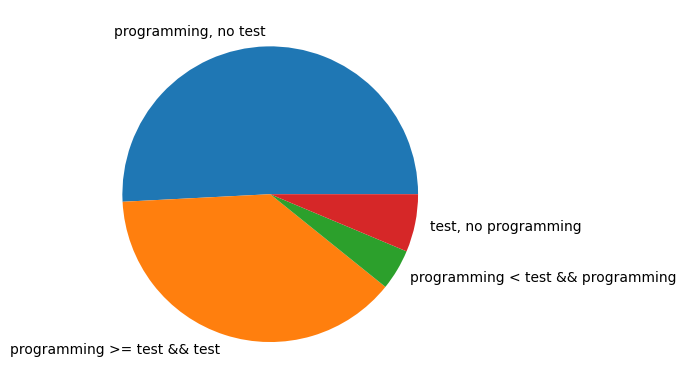

In [38]:
ezhulenev_split_sum.plot.pie()

#### Pairwise correlation between categories, per commit

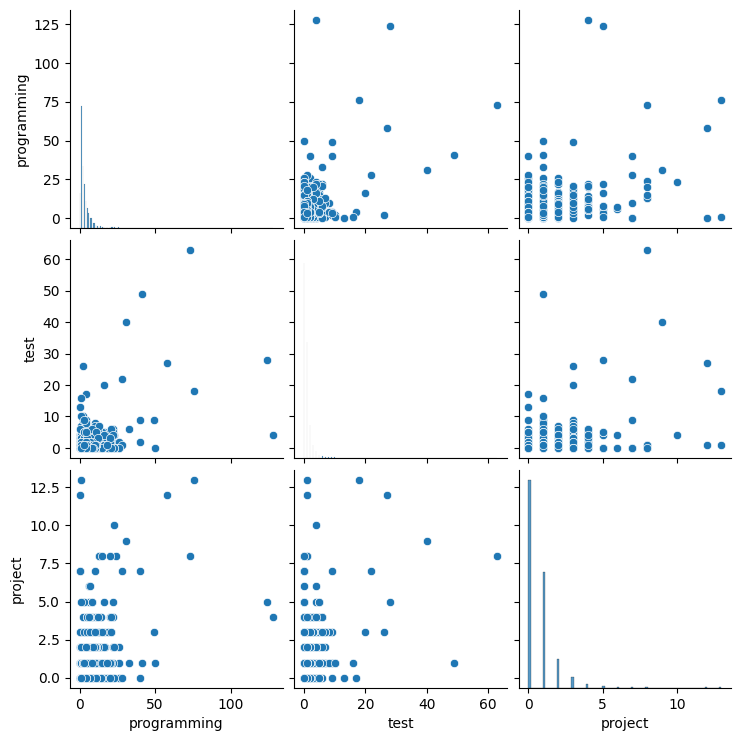

In [39]:
sns.pairplot(data=ezhulenev_per_commit_df[['programming', 'test', 'project']])

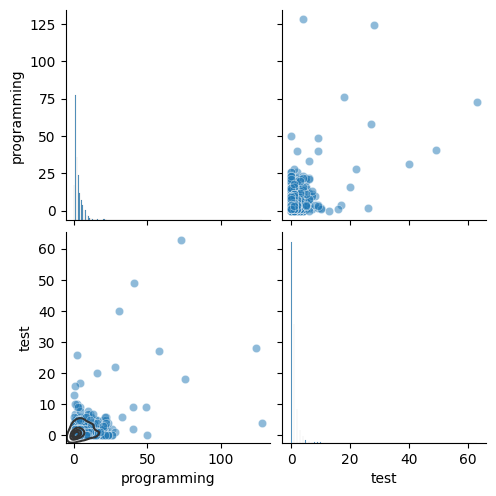

In [40]:
g = sns.pairplot(data=ezhulenev_per_commit_df[['programming', 'test']], plot_kws=dict(alpha=0.5))
g.map_lower(sns.kdeplot, levels=5, color=".2")

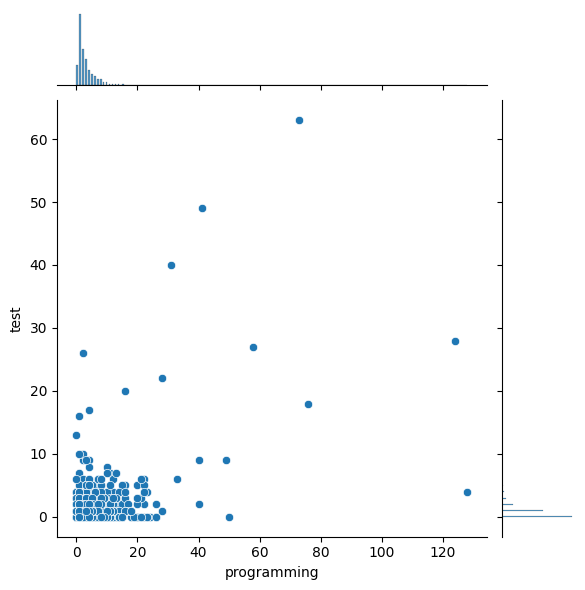

In [41]:
sns.jointplot(data=ezhulenev_per_commit_df, x="programming", y="test")

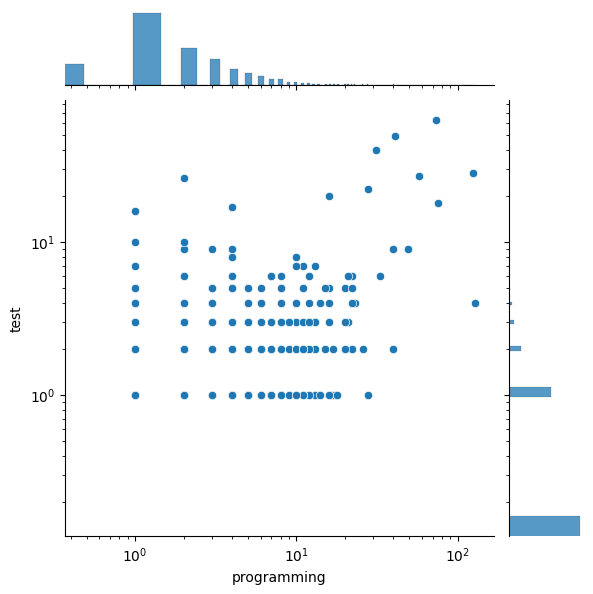

In [42]:
g = sns.jointplot(data=ezhulenev_per_commit_df, x="programming", y="test")

g.ax_joint.set_xscale('log')
g.ax_joint.set_yscale('log')

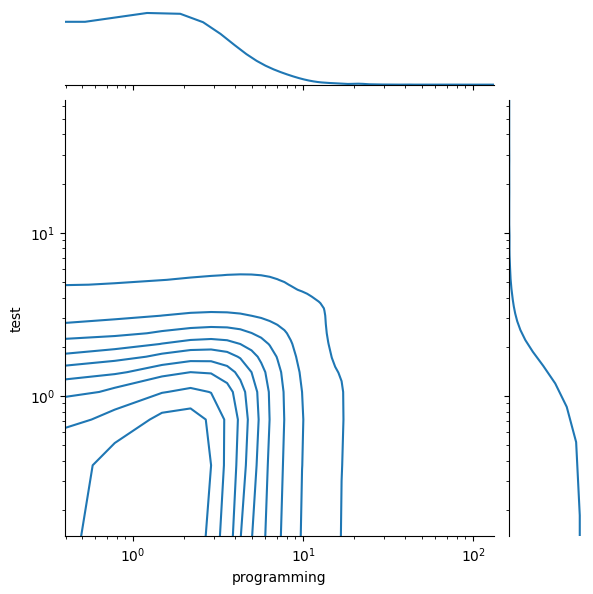

In [43]:
g = sns.jointplot(data=ezhulenev_per_commit_df, x="programming", y="test", kind="kde")

g.ax_joint.set_xscale('log')
g.ax_joint.set_yscale('log')

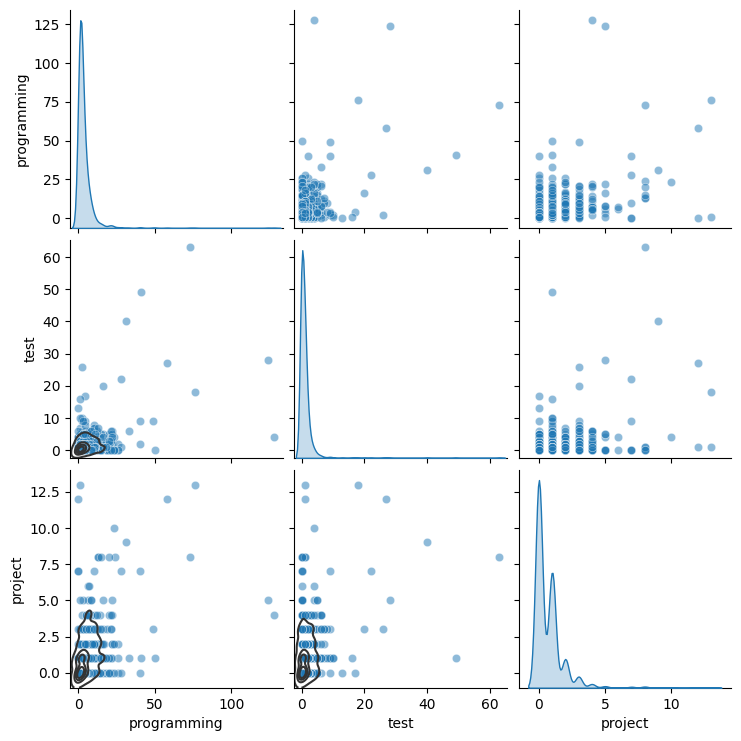

In [44]:
g = sns.pairplot(data=ezhulenev_per_commit_df[['programming', 'test', 'project']], diag_kind='kde', plot_kws=dict(alpha=0.5))
g.map_lower(sns.kdeplot, levels=5, color=".2")

### Line purposes

The annotation data was generated from the `tensorflow` repository with the following command:
```commandline
diff-annotate from-repo \
    --output-dir=~/example_annotations/tensorflow/ezhulenev/ \
    ~/example_repositories/tensorflow/ \
    --author=ezhulenev@google.com
```

This generates annotations in the "flat" format.

To make them compatibile with "hierarchical" / "bugsinpy" format that `diff-gather-stats` script expects
you need to create `annotation/` directory in each of "bug" directories, and move `*.json` files there:
```commandline
cd ~/example_annotations/tensorflow/ezhulenev/
mkdir annotation
mv *.json annotation/
```

-----

The statistics in `tensorflow.lines-stats.json` file were generated with the following command:
```commandline
diff-gather-stats lines-stats \
    ~/example_annotations/tensorflow.lines-stats.json \
    ~/example_annotations/tensorflow/
```

```commandline
$ time diff-gather-stats  --annotations-dir='' lines-stats \
    ~/example_annotations/tensorflow.lines-stats.json \
    ~/example_annotations/tensorflow/ezhulenev
Dataset /home/jnareb/example_annotations/tensorflow/ezhulenev
[...]
dataset: 100%|█████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.32s/it]
Saving results to '/home/jnareb/example_annotations/tensorflow.lines-stats.json' JSON file

real    0m3.137s
user    0m10.034s
sys     0m0.144s
```

In [45]:
with open('/home/jnareb/example_annotations/tensorflow.lines-stats.json', mode='r') as json_fp:
    tf_ezhulenev_lines_data = json.load(json_fp)

In [46]:
#tf_ezhulenev_lines_data

In [47]:
annotations_prefix

'/home/jnareb/example_annotations/'

In [48]:
ezhulenev_lines_data = tf_ezhulenev_lines_data[f'{annotations_prefix}tensorflow']['ezhulenev']

In [49]:
ezhulenev_lines_data['185a326927da6e1d5ca8dbb8506d4d353780bd2e.json']

{'commit_metadata': {'+': {}, '-': {}, '+/-': {}},
 'tensorflow/workspace.bzl': {'language': 'Starlark',
  'type': 'programming',
  'purpose': 'programming',
  '+': {'count': 4, 'type.code': 4, 'purpose.programming': 4},
  '-': {'count': 4, 'type.code': 4, 'purpose.programming': 4},
  '+/-': {'type.code': 8, 'purpose.programming': 8}}}

#### Number of removed/added lines

In [50]:
ezhulenev_lines_data['185a326927da6e1d5ca8dbb8506d4d353780bd2e.json']

{'commit_metadata': {'+': {}, '-': {}, '+/-': {}},
 'tensorflow/workspace.bzl': {'language': 'Starlark',
  'type': 'programming',
  'purpose': 'programming',
  '+': {'count': 4, 'type.code': 4, 'purpose.programming': 4},
  '-': {'count': 4, 'type.code': 4, 'purpose.programming': 4},
  '+/-': {'type.code': 8, 'purpose.programming': 8}}}

In [51]:
ezhulenev_lines_records = []
for patch_name, patch_data in ezhulenev_lines_data.items():
    for file_name, file_data in patch_data.items():
        if file_name == '/dev/null':
            continue
        if file_name == 'commit_metadata' and 'purpose' not in file_data:
            continue

        record = {
            'patchname': patch_name.removesuffix('.json'),
            'filename': file_name,
            'language': file_data['language'],
            'file_type': file_data['type'],
            'file_purpose': file_data['purpose'],
        }
        if '+' in file_data and 'count' in file_data['+']:
            record['+ count'] = file_data['+']['count']
        else:
            record['+ count'] = 0

        if '-' in file_data and 'count' in file_data['-']:
            record['- count'] = file_data['-']['count']
        else:
            record['- count'] = 0
        
        # TODO: process per-line type/purpose counts

        ezhulenev_lines_records.append(record)

In [52]:
ezhulenev_lines_records[:3]

[{'patchname': '185a326927da6e1d5ca8dbb8506d4d353780bd2e',
  'filename': 'tensorflow/workspace.bzl',
  'language': 'Starlark',
  'file_type': 'programming',
  'file_purpose': 'programming',
  '+ count': 4,
  '- count': 4},
 {'patchname': 'cdd37b886e0ac509320fc7391f9f1ac922c06454',
  'filename': 'third_party/xla/xla/service/cpu/benchmarks/BUILD',
  'language': 'Starlark',
  'file_type': 'programming',
  'file_purpose': 'project',
  '+ count': 16,
  '- count': 0},
 {'patchname': 'cdd37b886e0ac509320fc7391f9f1ac922c06454',
  'filename': 'third_party/xla/xla/service/cpu/benchmarks/optimizer_benchmark_test.cc',
  'language': 'C++',
  'file_type': 'programming',
  'file_purpose': 'test',
  '+ count': 121,
  '- count': 0}]

In [53]:
ezhulenev_lines_df = pd.DataFrame.from_records(ezhulenev_lines_records).convert_dtypes()
ezhulenev_lines_df

,patchname,filename,language,file_type,file_purpose,+ count,- count
0,185a326927da6e1d5ca8dbb8506d4d353780bd2e,tensorflow/workspace.bzl,Starlark,programming,programming,4,4
1,cdd37b886e0ac509320fc7391f9f1ac922c06454,third_party/xla/xla/service/cpu/benchmarks/BUILD,Starlark,programming,project,16,0
2,cdd37b886e0ac509320fc7391f9f1ac922c06454,third_party/xla/xla/service/cpu/benchmarks/opt...,C++,programming,test,121,0
3,286e7d4b24b4235ca71027b1a68d5619e1c70d8a,third_party/xla/xla/service/cpu/BUILD,Starlark,programming,project,5,38
4,286e7d4b24b4235ca71027b1a68d5619e1c70d8a,third_party/xla/xla/service/cpu/dot_op_emitter.cc,C++,programming,programming,27,134
...,...,...,...,...,...,...,...
10196,1a6ed44670279ff61e9d984067127acf5704344f,third_party/xla/xla/stream_executor/gpu/gpu_dr...,C,programming,programming,38,0
10197,1a6ed44670279ff61e9d984067127acf5704344f,third_party/xla/xla/stream_executor/gpu/gpu_ex...,C,programming,programming,7,0
10198,1a6ed44670279ff61e9d984067127acf5704344f,third_party/xla/xla/stream_executor/gpu/gpu_ty...,C,programming,programming,10,0
10199,1a6ed44670279ff61e9d984067127acf5704344f,third_party/xla/xla/stream_executor/stream_exe...,C,programming,programming,9,0


In [54]:
ezhulenev_lines_df.describe()

,+ count,- count
count,10201.0,10201.0
mean,19.355945,14.849328
std,49.519717,66.75833
min,0.0,0.0
25%,1.0,0.0
50%,4.0,2.0
75%,17.0,7.0
max,1356.0,2075.0


In [55]:
ezhulenev_lines_df_per_commit = ezhulenev_lines_df.groupby('patchname')[[ '- count', '+ count']].sum()
ezhulenev_lines_df_per_commit

,- count,+ count
patchname,,
0024f5d08dff98bd78ed48f5a46226d048583be7,6,38
003ab23a4dfc645eb9d41b9d0fc0c98a8ca3b73d,1,109
00652e6e6a0ffb9c60a21ac91680bc1ac5528bc4,2199,0
0071c1738eb5248fe9993bc7e437fa63e3a17742,6,58
007eb8a5b793ecbaa648b2e894df4f4c846a6156,105,90
...,...,...
ff3da2b31150f2dca37cfa1aff72418c6a89550f,7,7
ff3db2d32584175c67c11a2be36b54170bae473d,11,51
ffac1f66df235e8876d1140d2b37af6cc80ed890,6,30


In [56]:
ezhulenev_lines_df_per_commit.describe()

,- count,+ count
count,1896.0,1896.0
mean,79.89346,104.140295
std,509.566657,186.218799
min,0.0,0.0
25%,3.0,10.0
50%,14.0,43.0
75%,46.0,123.0
max,12875.0,2795.0


<Axes: ylabel='Frequency'>

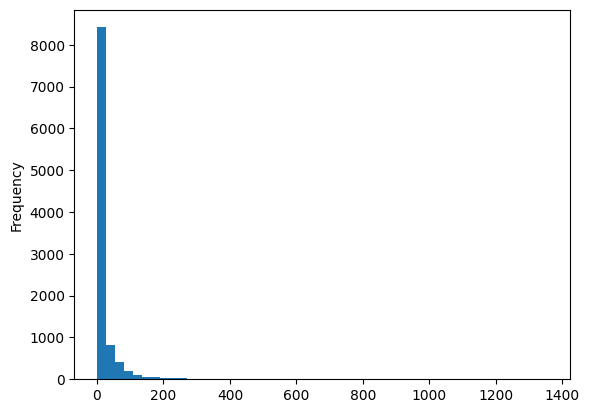

In [57]:
ezhulenev_lines_df['+ count'].plot.hist(bins=50)

<Axes: ylabel='Frequency'>

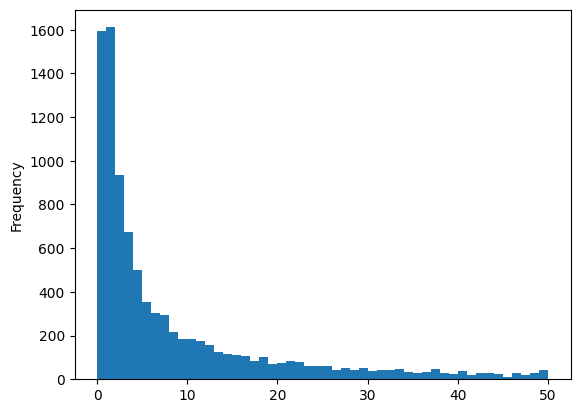

In [58]:
ezhulenev_lines_df['+ count'].plot.hist(bins=50, range=(0,50))

<Axes: ylabel='Frequency'>

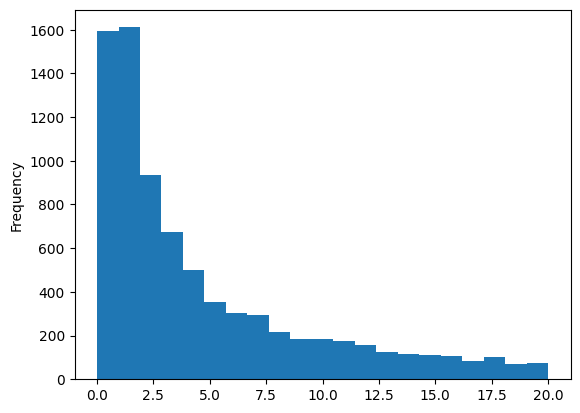

In [59]:
ezhulenev_lines_df['+ count'].plot.hist(bins=21, range=(0,20))

<Axes: ylabel='Frequency'>

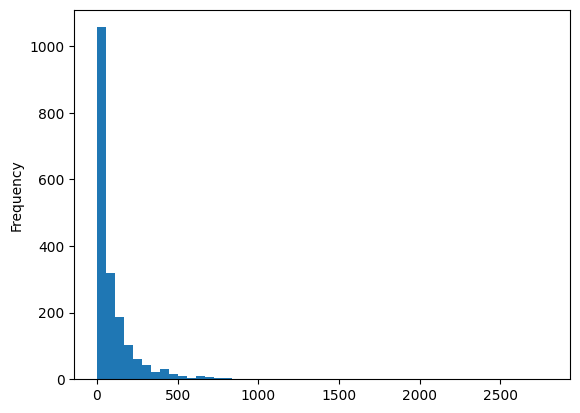

In [60]:
ezhulenev_lines_df_per_commit['+ count'].plot.hist(bins=50)

<Axes: ylabel='Frequency'>

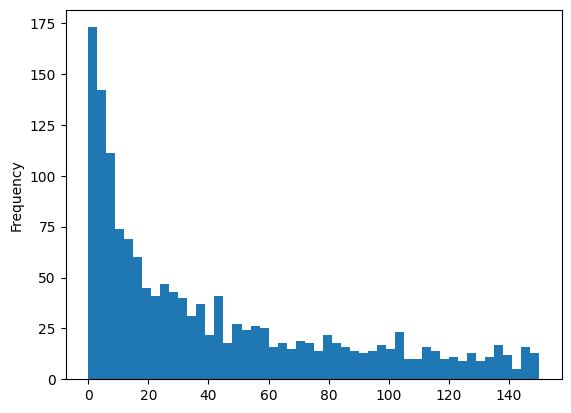

In [61]:
ezhulenev_lines_df_per_commit['+ count'].plot.hist(bins=50, range=(0,150))

Bihistogram, based on<br>
https://matplotlib.org/stable/gallery/statistics/histogram_bihistogram.html

In [62]:
added_counts   = ezhulenev_lines_df_per_commit['+ count'].values
removed_counts = ezhulenev_lines_df_per_commit['- count'].values

print(f"{len(added_counts)=}, {len(removed_counts)=}")
print(f"{max(added_counts)=}, {max(removed_counts)=}")

len(added_counts)=1896, len(removed_counts)=1896
max(added_counts)=np.int64(2795), max(removed_counts)=np.int64(12875)


In [63]:
# Use a constant bin width to make the two histograms easier to compare visually
bin_width = 1
max_value = 50

bins = np.arange(0, max_value + bin_width, bin_width)
bins

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

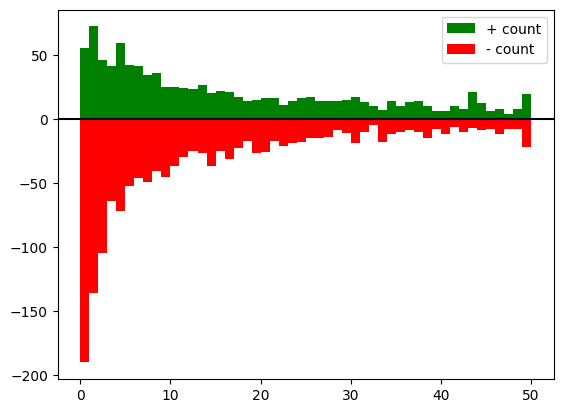

In [64]:
def bihistogram(dataset1, dataset2, dataset1_name, dataset2_name, bins):
    fig, ax = plt.subplots()

    # Plot the first histogram
    ax.hist(dataset1, bins=bins, label=dataset1_name, color='g')

    # Plot the second histogram
    # (notice the negative weights, which flip the histogram upside down)
    ax.hist(dataset2, weights=-np.ones_like(dataset2), bins=bins, label=dataset2_name, color='r')
    ax.axhline(0, color="k")
    ax.legend()

    plt.show()

bihistogram(added_counts, removed_counts, '+ count', '- count', bins)

[  0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51
  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 102 105
 108 111 114 117 120 123 126 129 132 135 138 141 144 147 150]


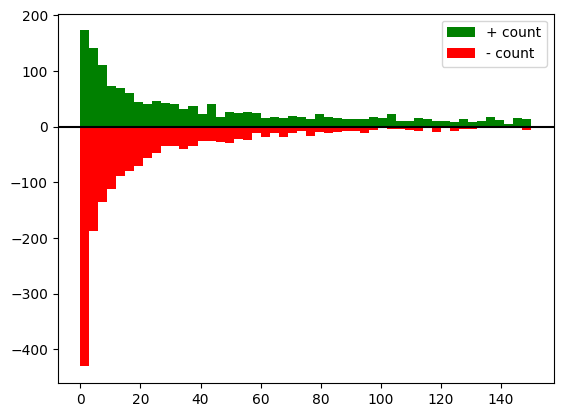

In [65]:
# Use a constant bin width to make the two histograms easier to compare visually
bin_width = 3
max_value = 150

bins = np.arange(0, max_value + bin_width, bin_width)
print(bins)

bihistogram(added_counts, removed_counts, '+ count', '- count', bins)

[  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175
 180 185 190 195 200 205 210 215 220 225 230 235 240 245 250 255 260 265
 270 275 280 285 290 295 300 305 310 315 320 325 330 335 340 345 350 355
 360 365 370 375 380 385 390 395 400 405 410 415 420 425 430 435 440 445
 450 455 460 465 470 475 480 485 490 495 500]


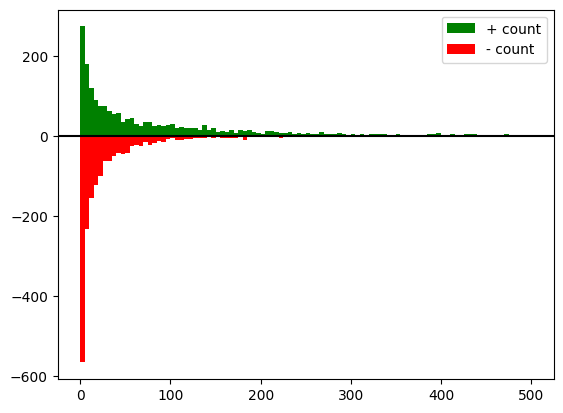

In [66]:
# Use a constant bin width to make the two histograms easier to compare visually
bin_width = 5
max_value = 500

bins = np.arange(0, max_value + bin_width, bin_width)
print(bins)

bihistogram(added_counts, removed_counts, '+ count', '- count', bins)

### Timeline

The annotation data was generated from the `tensorflow` repository with the following command:
```commandline
time diff-annotate from-repo \
    --output-dir=~/example_annotations/tensorflow/ezhulenev/ \
    ~/example_repositories/tensorflow/ \
    --author=ezhulenev@google.com
```

This generates annotations in the "flat" format,
and produces the output that looks like the following.

```
Logging to 'diff-annotate.log', with log level=WARNING
Storing annotations in <output_dir>/<commit_id>.json
  with output dir: '/home/jnareb/example_annotations/tensorflow/ezhulenev'
Ensuring that output directory '/home/jnareb/example_annotations/tensorflow/ezhulenev' exists
Generating patches from local Git repo '/home/jnareb/example_repositories/tensorflow'
  using `git log -p '--author=ezhulenev@google.com'`
  took 188.148 seconds (includes parsing unified diffs)
Annotating commits and saving annotated data, for 1896 commits
  lexing pre- and post-image file contents, from repo 'tensorflow'
  using sequential processing
[...]
commits: 100%|███████████████████████████████████████████████| 1896/1896 [12:55<00:00,  2.45it/s]
real    16m2.935s
user    15m44.417s
sys     0m33.393s
```

-----

The statistics in `'tensorflow.timeline.json'` file were generated with the following command:

```commandline
time diff-gather-stats \
    --annotations-dir='' \
    timeline \
    ~/example_annotations/tensorflow.lines-stats.json \
    ~/example_annotations/tensorflow/
```

This produces the output that looks like the following:

```
Dataset /home/jnareb/example_annotations/tensorflow
dataset: 100%|█████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.61s/it]
Saving results to '/home/jnareb/example_annotations/tensorflow.timeline.json' JSON file

real    0m3.284s
user    0m10.169s
sys     0m0.172s
```

In [67]:
annotations_path = '/home/jnareb/example_annotations'

with open(f'{annotations_path}/tensorflow.timeline.json', mode='r') as json_fp:
    tf_timeline_data = json.load(json_fp)

In [68]:
tf_timeline_data.keys()

dict_keys(['tensorflow'])

In [69]:
tf_timeline_data['tensorflow'][:3]

[{'bug_id': 'ezhulenev',
  'patch_id': '185a326927da6e1d5ca8dbb8506d4d353780bd2e.json',
  'file_names': 1,
  'language:Starlark': 1,
  'type:programming': 1,
  'purpose:programming': 1,
  '+:count': 4,
  '+:type.code': 4,
  '+:purpose.programming': 4,
  '-:count': 4,
  '-:type.code': 4,
  '-:purpose.programming': 4,
  'author.timestamp': 1567628174,
  'author.tz_info': '-0700',
  'author.name': 'Eugene Zhulenev',
  'author.email': 'ezhulenev@google.com',
  'committer.timestamp': 1567629126,
  'committer.tz_info': '-0700',
  'committer.name': 'TensorFlower Gardener',
  'committer.email': 'gardener@tensorflow.org',
  'n_parents': 1},
 {'bug_id': 'ezhulenev',
  'patch_id': 'cdd37b886e0ac509320fc7391f9f1ac922c06454.json',
  'file_names': 3,
  'language:Starlark': 1,
  'type:programming': 2,
  'purpose:project': 1,
  '+:count': 137,
  '+:type.code': 100,
  '+:purpose.project': 16,
  '+:type.documentation': 37,
  'language:/dev/null': 1,
  'type:other': 1,
  'purpose:other': 1,
  'language:C

In [70]:
tf_timeline_df = pd.DataFrame.from_records(tf_timeline_data['tensorflow'])
tf_timeline_df

,bug_id,patch_id,file_names,language:Starlark,type:programming,purpose:programming,+:count,+:type.code,+:purpose.programming,-:count,...,-:purpose.markup,language:Cython,language:Ignore List,language:Shell,language:Java,language:Assembly,language:Go,language:CODEOWNERS,language:Dockerfile,language:Maven POM
0,ezhulenev,185a326927da6e1d5ca8dbb8506d4d353780bd2e.json,1.0,1.0,1.0,1.0,4.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ezhulenev,cdd37b886e0ac509320fc7391f9f1ac922c06454.json,3.0,1.0,2.0,NaN,137.0,100.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ezhulenev,286e7d4b24b4235ca71027b1a68d5619e1c70d8a.json,6.0,1.0,5.0,4.0,41.0,7.0,36.0,365.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ezhulenev,16d1692abf45b88b4bc7ee7f1b11fdde10af8c69.json,13.0,5.0,10.0,4.0,651.0,608.0,67.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ezhulenev,4ec3af25a993f29a5b340bc4d577cc6ee115cf02.json,2.0,1.0,2.0,1.0,120.0,93.0,119.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3339,yong.tang,44e88008ad4b5704357816b726ff86cf7d2e4dd3.json,1.0,NaN,1.0,1.0,3.0,3.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3340,yong.tang,efdc23321b8038d2dfc3ac4da058b00de3c15059.json,4.0,NaN,4.0,NaN,17.0,14.0,NaN,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3341,yong.tang,8e3b32d37ce22c07c21f508b2835456f3ca97531.json,1.0,NaN,1.0,1.0,5.0,3.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3342,yong.tang,fde6610772a2034a043332acb4b634a8796151fa.json,4.0,NaN,4.0,4.0,10.0,7.0,10.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
tf_ezhulenev_timeline_df = tf_timeline_df[tf_timeline_df['bug_id'] == 'ezhulenev'].drop(columns=['bug_id'])
tf_ezhulenev_timeline_df

,patch_id,file_names,language:Starlark,type:programming,purpose:programming,+:count,+:type.code,+:purpose.programming,-:count,-:type.code,...,-:purpose.markup,language:Cython,language:Ignore List,language:Shell,language:Java,language:Assembly,language:Go,language:CODEOWNERS,language:Dockerfile,language:Maven POM
0,185a326927da6e1d5ca8dbb8506d4d353780bd2e.json,1.0,1.0,1.0,1.0,4.0,4.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,cdd37b886e0ac509320fc7391f9f1ac922c06454.json,3.0,1.0,2.0,NaN,137.0,100.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,286e7d4b24b4235ca71027b1a68d5619e1c70d8a.json,6.0,1.0,5.0,4.0,41.0,7.0,36.0,365.0,196.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16d1692abf45b88b4bc7ee7f1b11fdde10af8c69.json,13.0,5.0,10.0,4.0,651.0,608.0,67.0,20.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4ec3af25a993f29a5b340bc4d577cc6ee115cf02.json,2.0,1.0,2.0,1.0,120.0,93.0,119.0,83.0,62.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1891,221a11ce98fc3583a9d84c43040393787cef2485.json,1.0,NaN,1.0,NaN,2.0,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1892,6d3654f71a3525711fe62304a4bcd02a53b52ad0.json,63.0,9.0,49.0,28.0,78.0,14.0,48.0,78.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1893,ce1e9c914a983437208376bd1aaf19ad0b8687af.json,2.0,NaN,2.0,2.0,15.0,13.0,15.0,8.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1894,1a6ed44670279ff61e9d984067127acf5704344f.json,17.0,2.0,17.0,12.0,414.0,241.0,318.0,38.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
tf_yongtang_timeline_df = tf_timeline_df[tf_timeline_df['bug_id'] == 'yong.tang'].drop(columns=['bug_id'])
tf_yongtang_timeline_df

,patch_id,file_names,language:Starlark,type:programming,purpose:programming,+:count,+:type.code,+:purpose.programming,-:count,-:type.code,...,-:purpose.markup,language:Cython,language:Ignore List,language:Shell,language:Java,language:Assembly,language:Go,language:CODEOWNERS,language:Dockerfile,language:Maven POM
1896,fe46bb0c4dc150590d659d0924816775efc920da.json,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1897,7c06ae2fd9b933e83aea0e5088c0b32b7c1fcaaf.json,1.0,NaN,1.0,NaN,1.0,1.0,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1898,c4ab2d38bcd48b5ae9cca7fe94ac11a8a28683fa.json,1.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1899,23890c005abf30410e8a2092b7fe426a47bde2c4.json,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900,a52a564659f2a30266bd24306cf6f4da08e7ef2e.json,1.0,NaN,1.0,NaN,10.0,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3339,44e88008ad4b5704357816b726ff86cf7d2e4dd3.json,1.0,NaN,1.0,1.0,3.0,3.0,3.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3340,efdc23321b8038d2dfc3ac4da058b00de3c15059.json,4.0,NaN,4.0,NaN,17.0,14.0,NaN,24.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3341,8e3b32d37ce22c07c21f508b2835456f3ca97531.json,1.0,NaN,1.0,1.0,5.0,3.0,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3342,fde6610772a2034a043332acb4b634a8796151fa.json,4.0,NaN,4.0,4.0,10.0,7.0,10.0,6.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
tf_yongtang_timeline_df[['patch_id', '+:count', '-:count', 'author.timestamp', 'author.tz_info']]

,patch_id,+:count,-:count,author.timestamp,author.tz_info
1896,fe46bb0c4dc150590d659d0924816775efc920da.json,1.0,1.0,1.589995e+09,+0000
1897,7c06ae2fd9b933e83aea0e5088c0b32b7c1fcaaf.json,1.0,1.0,1.522178e+09,-0700
1898,c4ab2d38bcd48b5ae9cca7fe94ac11a8a28683fa.json,1.0,NaN,1.589082e+09,+0000
1899,23890c005abf30410e8a2092b7fe426a47bde2c4.json,1.0,1.0,1.588102e+09,+0000
1900,a52a564659f2a30266bd24306cf6f4da08e7ef2e.json,10.0,NaN,1.663801e+09,+0000
...,...,...,...,...,...
3339,44e88008ad4b5704357816b726ff86cf7d2e4dd3.json,3.0,3.0,1.535931e+09,+0000
3340,efdc23321b8038d2dfc3ac4da058b00de3c15059.json,17.0,24.0,1.529700e+09,-0700
3341,8e3b32d37ce22c07c21f508b2835456f3ca97531.json,5.0,NaN,1.645649e+09,+0000
3342,fde6610772a2034a043332acb4b634a8796151fa.json,10.0,6.0,1.527102e+09,+0000


In [74]:
tf_ezhulenev_timeline_df.columns

Index(['patch_id', 'file_names', 'language:Starlark', 'type:programming',
       'purpose:programming', '+:count', '+:type.code',
       '+:purpose.programming', '-:count', '-:type.code',
       '-:purpose.programming', 'author.timestamp', 'author.tz_info',
       'author.name', 'author.email', 'committer.timestamp',
       'committer.tz_info', 'committer.name', 'committer.email', 'n_parents',
       'purpose:project', '+:purpose.project', '+:type.documentation',
       'language:/dev/null', 'type:other', 'purpose:other', 'language:C++',
       'purpose:test', '+:purpose.test', '-:purpose.project',
       '-:type.documentation', 'language:C', 'language:unknown',
       '-:purpose.other', '+:purpose.other', 'language:MLIR', '-:purpose.test',
       'language:Python', 'language:Protocol Buffer', 'type:data',
       'purpose:data', '+:purpose.data', '-:purpose.data', 'language:CMake',
       'language:Diff', 'language:Markdown', 'type:prose',
       'purpose:documentation', '+:purpose.doc

#### Added and removed lines, a timeline

column='+:count', color='green', invert=False
column='-:count', color='red', invert=True


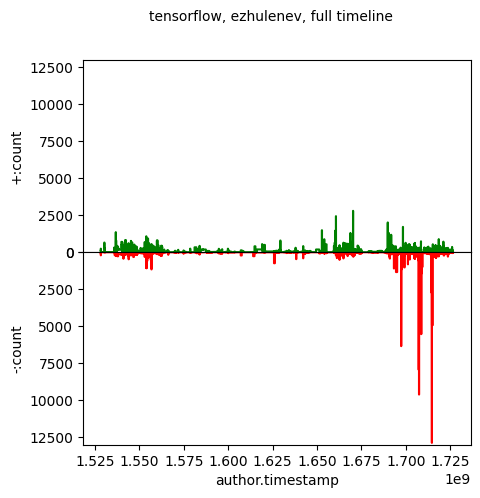

In [75]:
# https://stackoverflow.com/questions/62678411/how-to-plot-a-paired-histogram-using-seaborn
# https://stackoverflow.com/a/62678622/46058

fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(5,5))

for ax, column, color, invert in zip(axes.ravel(), ['+:count', '-:count'], ['green', 'red'], [False,True]):
    print(f"{column=}, {color=}, {invert=}")
    sns.lineplot(ax=ax, data=tf_ezhulenev_timeline_df, 
                 x='author.timestamp', y=column, 
                 color=color, drawstyle='steps-post')
    ax.set_ylim(0, 13000)
    
    if invert:
        ax.invert_yaxis()
        
plt.subplots_adjust(hspace=0)
plt.suptitle('tensorflow, ezhulenev, full timeline', fontsize=10)

plt.show()

column='+:count', color='green', invert=False
column='-:count', color='red', invert=True


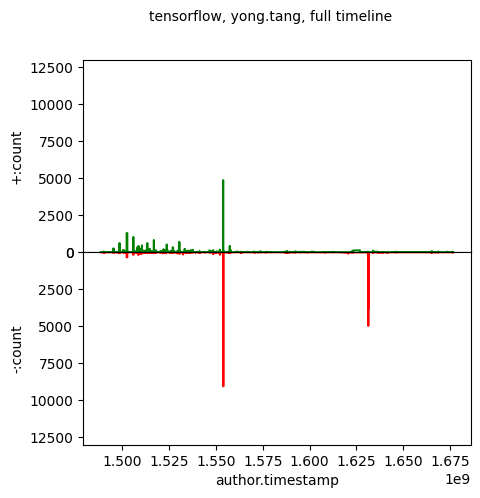

In [76]:
# https://stackoverflow.com/questions/62678411/how-to-plot-a-paired-histogram-using-seaborn
# https://stackoverflow.com/a/62678622/46058

fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(5,5))

for ax, column, color, invert in zip(axes.ravel(), ['+:count', '-:count'], ['green', 'red'], [False,True]):
    print(f"{column=}, {color=}, {invert=}")
    sns.lineplot(ax=ax, data=tf_yongtang_timeline_df, 
                 x='author.timestamp', y=column, 
                 color=color, drawstyle='steps-post')
    ax.set_ylim(0, 13000)
    #ax.set_ylim(1.500e9, 1.750e9)
    
    if invert:
        ax.invert_yaxis()
        
plt.subplots_adjust(hspace=0)
plt.suptitle('tensorflow, yong.tang, full timeline', fontsize=10)

plt.show()

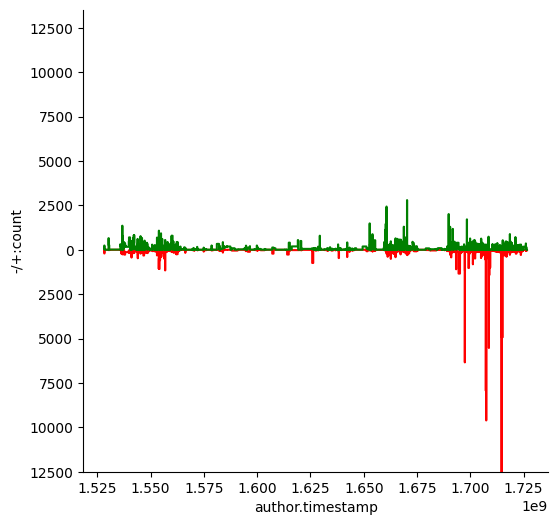

In [77]:
# https://stackoverflow.com/questions/62678411/how-to-plot-a-paired-histogram-using-seaborn
# https://stackoverflow.com/a/62679970/46058

fig, ax = plt.subplots(figsize=(6, 6))

sns.lineplot(ax=ax, data=tf_ezhulenev_timeline_df, 
             x='author.timestamp', y='-:count', 
             color='red', drawstyle='steps-post')
for p in ax.patches:  # turn the bars upside down
    p.set_height(-p.get_height())
for l in ax.lines:  # turn curve upside down
    l.set_ydata(-l.get_ydata())

sns.lineplot(ax=ax, data=tf_ezhulenev_timeline_df, 
             x='author.timestamp', y='+:count', 
             color='green', drawstyle='steps-post')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_yticks(np.arange(0, 15000, 2500))
pos_yticks = np.array([t for t in ax.get_yticks() if t > 0])
yticks = np.concatenate([-pos_yticks[::-1], [0], pos_yticks])
ax.set_yticks(yticks)
ax.set_yticklabels([f'{abs(t):d}' for t in yticks])

ax.set_ylabel('-/+:count')
#ax.spines['bottom'].set_position('zero')

plt.show()

#### To datetime (converted to UTC)

In [78]:
tf_ezhulenev_timeline_df.columns

Index(['patch_id', 'file_names', 'language:Starlark', 'type:programming',
       'purpose:programming', '+:count', '+:type.code',
       '+:purpose.programming', '-:count', '-:type.code',
       '-:purpose.programming', 'author.timestamp', 'author.tz_info',
       'author.name', 'author.email', 'committer.timestamp',
       'committer.tz_info', 'committer.name', 'committer.email', 'n_parents',
       'purpose:project', '+:purpose.project', '+:type.documentation',
       'language:/dev/null', 'type:other', 'purpose:other', 'language:C++',
       'purpose:test', '+:purpose.test', '-:purpose.project',
       '-:type.documentation', 'language:C', 'language:unknown',
       '-:purpose.other', '+:purpose.other', 'language:MLIR', '-:purpose.test',
       'language:Python', 'language:Protocol Buffer', 'type:data',
       'purpose:data', '+:purpose.data', '-:purpose.data', 'language:CMake',
       'language:Diff', 'language:Markdown', 'type:prose',
       'purpose:documentation', '+:purpose.doc

In [79]:
tf_ezhulenev_timeline_df[['patch_id', 'author.timestamp', 'author.tz_info', 'committer.timestamp', 'committer.tz_info']]

,patch_id,author.timestamp,author.tz_info,committer.timestamp,committer.tz_info
0,185a326927da6e1d5ca8dbb8506d4d353780bd2e.json,1.567628e+09,-0700,1.567629e+09,-0700
1,cdd37b886e0ac509320fc7391f9f1ac922c06454.json,1.718435e+09,-0700,1.718437e+09,-0700
2,286e7d4b24b4235ca71027b1a68d5619e1c70d8a.json,1.717176e+09,-0700,1.717178e+09,-0700
3,16d1692abf45b88b4bc7ee7f1b11fdde10af8c69.json,1.659997e+09,-0700,1.659998e+09,-0700
4,4ec3af25a993f29a5b340bc4d577cc6ee115cf02.json,1.717995e+09,-0700,1.717995e+09,-0700
...,...,...,...,...,...
1891,221a11ce98fc3583a9d84c43040393787cef2485.json,1.579288e+09,-0800,1.579288e+09,-0800
1892,6d3654f71a3525711fe62304a4bcd02a53b52ad0.json,1.667257e+09,-0700,1.667257e+09,-0700
1893,ce1e9c914a983437208376bd1aaf19ad0b8687af.json,1.615314e+09,-0800,1.615314e+09,-0800
1894,1a6ed44670279ff61e9d984067127acf5704344f.json,1.700518e+09,-0800,1.700518e+09,-0800


In [80]:
tf_ezhulenev_timeline_df[['patch_id', 'author.timestamp', 'author.tz_info', 'committer.timestamp', 'committer.tz_info']].loc[0]

patch_id               185a326927da6e1d5ca8dbb8506d4d353780bd2e.json
author.timestamp                                        1567628174.0
author.tz_info                                                 -0700
committer.timestamp                                     1567629126.0
committer.tz_info                                              -0700
Name: 0, dtype: object

In [81]:
pd.Timestamp.fromtimestamp(1567628174, tz='-0700')

Timestamp('2019-09-04 13:16:14-0700', tz='UTC-07:00')

In [82]:
tf_ezhulenev_timeline_df[['author.timestamp', 'author.tz_info']].apply(
    lambda x: pd.Timestamp.fromtimestamp(x['author.timestamp'], tz=x['author.tz_info']),
axis='columns')

0       2019-09-04 13:16:14-07:00
1       2024-06-15 00:09:04-07:00
2       2024-05-31 10:22:24-07:00
3       2022-08-08 15:21:01-07:00
4       2024-06-09 21:42:24-07:00
                  ...            
1891    2020-01-17 11:09:48-08:00
1892    2022-10-31 15:55:55-07:00
1893    2021-03-09 10:23:36-08:00
1894    2023-11-20 14:10:03-08:00
1895    2019-05-15 16:36:08-07:00
Length: 1896, dtype: object

In [83]:
# ValueError: Tz-aware datetime.datetime cannot be converted to datetime64 unless utc=True

#tf_ezhulenev_timeline_df[['author.timestamp', 'author.tz_info']].apply(
#    lambda x: pd.Timestamp.fromtimestamp(x['author.timestamp'], tz=x['author.tz_info']),
#axis='columns').astype('datetime64[ns]')

In [84]:
tf_ezhulenev_timeline_df[['author.timestamp', 'author.tz_info']].apply(
    lambda x: pd.Timestamp.fromtimestamp(x['author.timestamp'], tz='UTC'),
axis='columns').astype('datetime64[ns, UTC]')

0      2019-09-04 20:16:14+00:00
1      2024-06-15 07:09:04+00:00
2      2024-05-31 17:22:24+00:00
3      2022-08-08 22:21:01+00:00
4      2024-06-10 04:42:24+00:00
                  ...           
1891   2020-01-17 19:09:48+00:00
1892   2022-10-31 22:55:55+00:00
1893   2021-03-09 18:23:36+00:00
1894   2023-11-20 22:10:03+00:00
1895   2019-05-15 23:36:08+00:00
Length: 1896, dtype: datetime64[ns, UTC]

In [85]:
tf_ezhulenev_timeline_df[['author.timestamp', 'committer.timestamp']].isna().sum()

author.timestamp       0
committer.timestamp    0
dtype: int64

In [86]:
tf_ezhulenev_timeline_df['author.date'] = tf_ezhulenev_timeline_df[['author.timestamp', 'author.tz_info']].apply(
    lambda x: pd.Timestamp.fromtimestamp(x['author.timestamp'], tz='UTC'),
axis='columns').astype('datetime64[ns, UTC]')

tf_ezhulenev_timeline_df['committer.date'] = tf_ezhulenev_timeline_df[['committer.timestamp', 'committer.tz_info']].apply(
    lambda x: pd.Timestamp.fromtimestamp(x['committer.timestamp'], tz='UTC'),
axis='columns').astype('datetime64[ns, UTC]')

In [87]:
tf_yongtang_timeline_df[['author.timestamp', 'committer.timestamp']].isna().sum()

author.timestamp       1
committer.timestamp    1
dtype: int64

In [88]:
tf_yongtang_timeline_df.dropna(inplace=True, subset=['author.timestamp', 'committer.timestamp'], how='any')

In [89]:
tf_yongtang_timeline_df[['author.timestamp', 'committer.timestamp']].isna().sum()

author.timestamp       0
committer.timestamp    0
dtype: int64

In [90]:
tf_yongtang_timeline_df[['patch_id', 'author.timestamp', 'author.tz_info', 'committer.timestamp', 'committer.tz_info', '-:count', '+:count']]

,patch_id,author.timestamp,author.tz_info,committer.timestamp,committer.tz_info,-:count,+:count
1896,fe46bb0c4dc150590d659d0924816775efc920da.json,1.589995e+09,+0000,1.589995e+09,+0000,1.0,1.0
1897,7c06ae2fd9b933e83aea0e5088c0b32b7c1fcaaf.json,1.522178e+09,-0700,1.522178e+09,-0700,1.0,1.0
1898,c4ab2d38bcd48b5ae9cca7fe94ac11a8a28683fa.json,1.589082e+09,+0000,1.589082e+09,+0000,NaN,1.0
1899,23890c005abf30410e8a2092b7fe426a47bde2c4.json,1.588102e+09,+0000,1.589303e+09,-0700,1.0,1.0
1900,a52a564659f2a30266bd24306cf6f4da08e7ef2e.json,1.663801e+09,+0000,1.663801e+09,+0000,NaN,10.0
...,...,...,...,...,...,...,...
3339,44e88008ad4b5704357816b726ff86cf7d2e4dd3.json,1.535931e+09,+0000,1.539032e+09,+0000,3.0,3.0
3340,efdc23321b8038d2dfc3ac4da058b00de3c15059.json,1.529700e+09,-0700,1.529700e+09,-0700,24.0,17.0
3341,8e3b32d37ce22c07c21f508b2835456f3ca97531.json,1.645649e+09,+0000,1.645649e+09,+0000,NaN,5.0
3342,fde6610772a2034a043332acb4b634a8796151fa.json,1.527102e+09,+0000,1.530309e+09,+0000,6.0,10.0


In [91]:
tf_yongtang_timeline_df['author.date'] = tf_yongtang_timeline_df[['author.timestamp']].apply(
    lambda x: pd.Timestamp.fromtimestamp(x['author.timestamp'], tz='UTC'),
axis='columns').astype('datetime64[ns, UTC]')

tf_yongtang_timeline_df['committer.date'] = tf_yongtang_timeline_df[['committer.timestamp']].apply(
    lambda x: pd.Timestamp.fromtimestamp(x['committer.timestamp'], tz='UTC'),
axis='columns').astype('datetime64[ns, UTC]')

In [92]:
tf_ezhulenev_timeline_df[['patch_id', 'author.timestamp', 'author.date', 'author.tz_info', 'committer.timestamp', 'committer.date', 'committer.tz_info']]

,patch_id,author.timestamp,author.date,author.tz_info,committer.timestamp,committer.date,committer.tz_info
0,185a326927da6e1d5ca8dbb8506d4d353780bd2e.json,1.567628e+09,2019-09-04 20:16:14+00:00,-0700,1.567629e+09,2019-09-04 20:32:06+00:00,-0700
1,cdd37b886e0ac509320fc7391f9f1ac922c06454.json,1.718435e+09,2024-06-15 07:09:04+00:00,-0700,1.718437e+09,2024-06-15 07:31:48+00:00,-0700
2,286e7d4b24b4235ca71027b1a68d5619e1c70d8a.json,1.717176e+09,2024-05-31 17:22:24+00:00,-0700,1.717178e+09,2024-05-31 17:51:38+00:00,-0700
3,16d1692abf45b88b4bc7ee7f1b11fdde10af8c69.json,1.659997e+09,2022-08-08 22:21:01+00:00,-0700,1.659998e+09,2022-08-08 22:27:46+00:00,-0700
4,4ec3af25a993f29a5b340bc4d577cc6ee115cf02.json,1.717995e+09,2024-06-10 04:42:24+00:00,-0700,1.717995e+09,2024-06-10 04:53:19+00:00,-0700
...,...,...,...,...,...,...,...
1891,221a11ce98fc3583a9d84c43040393787cef2485.json,1.579288e+09,2020-01-17 19:09:48+00:00,-0800,1.579288e+09,2020-01-17 19:12:45+00:00,-0800
1892,6d3654f71a3525711fe62304a4bcd02a53b52ad0.json,1.667257e+09,2022-10-31 22:55:55+00:00,-0700,1.667257e+09,2022-10-31 23:01:46+00:00,-0700
1893,ce1e9c914a983437208376bd1aaf19ad0b8687af.json,1.615314e+09,2021-03-09 18:23:36+00:00,-0800,1.615314e+09,2021-03-09 18:27:30+00:00,-0800
1894,1a6ed44670279ff61e9d984067127acf5704344f.json,1.700518e+09,2023-11-20 22:10:03+00:00,-0800,1.700518e+09,2023-11-20 22:14:23+00:00,-0800


In [93]:
tf_ezhulenev_timeline_df.dtypes

patch_id                            object
file_names                         float64
language:Starlark                  float64
type:programming                   float64
purpose:programming                float64
                              ...         
language:CODEOWNERS                float64
language:Dockerfile                float64
language:Maven POM                 float64
author.date            datetime64[ns, UTC]
committer.date         datetime64[ns, UTC]
Length: 68, dtype: object

#### Groupby / resample

In [94]:
pm_count_cols = [col for col in tf_ezhulenev_timeline_df.columns if col.startswith('+:') or col.startswith('-:')]
pm_count_cols.sort(key=lambda s: s[2:]+('0' if s[0] == '-' else '1'))
pm_count_cols

['-:count',
 '+:count',
 '-:purpose.data',
 '+:purpose.data',
 '-:purpose.documentation',
 '+:purpose.documentation',
 '-:purpose.markup',
 '+:purpose.markup',
 '-:purpose.other',
 '+:purpose.other',
 '-:purpose.programming',
 '+:purpose.programming',
 '-:purpose.project',
 '+:purpose.project',
 '-:purpose.test',
 '+:purpose.test',
 '-:type.code',
 '+:type.code',
 '-:type.documentation',
 '+:type.documentation']

In [95]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
tf_resampled_W_df = tf_ezhulenev_timeline_df.resample('W', on='author.date')[pm_count_cols].sum()
tf_resampled_W_df

,-:count,+:count,-:purpose.data,+:purpose.data,-:purpose.documentation,+:purpose.documentation,-:purpose.markup,+:purpose.markup,-:purpose.other,+:purpose.other,-:purpose.programming,+:purpose.programming,-:purpose.project,+:purpose.project,-:purpose.test,+:purpose.test,-:type.code,+:type.code,-:type.documentation,+:type.documentation
author.date,,,,,,,,,,,,,,,,,,,,
2018-06-10 00:00:00+00:00,341.0,503.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,264.0,345.0,0.0,0.0,77.0,158.0,289.0,378.0,52.0,125.0
2018-06-17 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-06-24 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-07-01 00:00:00+00:00,21.0,1564.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,1069.0,0.0,71.0,0.0,424.0,17.0,1048.0,4.0,516.0
2018-07-08 00:00:00+00:00,3.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,10.0,0.0,0.0,0.0,0.0,3.0,6.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-25 00:00:00+00:00,438.0,1317.0,3.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,405.0,1066.0,2.0,41.0,28.0,202.0,338.0,854.0,100.0,463.0
2024-09-01 00:00:00+00:00,135.0,759.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77.0,440.0,18.0,55.0,40.0,264.0,115.0,501.0,20.0,258.0
2024-09-08 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
tf_resampled_ME_df = tf_ezhulenev_timeline_df.resample('ME', on='author.date')[pm_count_cols].sum()
tf_resampled_ME_df

,-:count,+:count,-:purpose.data,+:purpose.data,-:purpose.documentation,+:purpose.documentation,-:purpose.markup,+:purpose.markup,-:purpose.other,+:purpose.other,-:purpose.programming,+:purpose.programming,-:purpose.project,+:purpose.project,-:purpose.test,+:purpose.test,-:type.code,+:type.code,-:type.documentation,+:type.documentation
author.date,,,,,,,,,,,,,,,,,,,,
2018-06-30 00:00:00+00:00,362.0,2067.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,285.0,1414.0,0.0,71.0,77.0,582.0,306.0,1426.0,56.0,641.0
2018-07-31 00:00:00+00:00,4.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,19.0,0.0,1.0,0.0,0.0,4.0,12.0,0.0,8.0
2018-08-31 00:00:00+00:00,14.0,543.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,214.0,0.0,25.0,14.0,304.0,1.0,300.0,13.0,243.0
2018-09-30 00:00:00+00:00,1363.0,4322.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1328.0,3722.0,0.0,21.0,35.0,579.0,1079.0,3123.0,284.0,1199.0
2018-10-31 00:00:00+00:00,1038.0,2633.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,694.0,1472.0,6.0,25.0,338.0,1136.0,902.0,1912.0,136.0,721.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-31 00:00:00+00:00,39250.0,7262.0,29.0,23.0,192.0,87.0,0.0,0.0,3239.0,2.0,28903.0,5238.0,2175.0,476.0,4712.0,1436.0,24292.0,4758.0,14958.0,2504.0
2024-06-30 00:00:00+00:00,2911.0,11271.0,12.0,23.0,4.0,65.0,0.0,0.0,0.0,0.0,2391.0,7308.0,29.0,968.0,475.0,2907.0,2171.0,7658.0,740.0,3613.0
2024-07-31 00:00:00+00:00,2382.0,6446.0,0.0,14.0,0.0,0.0,0.0,0.0,1.0,22.0,1598.0,4285.0,16.0,210.0,767.0,1915.0,1922.0,4522.0,460.0,1924.0


In [97]:
tf_yongtang_timeline_df

,patch_id,file_names,language:Starlark,type:programming,purpose:programming,+:count,+:type.code,+:purpose.programming,-:count,-:type.code,...,language:Ignore List,language:Shell,language:Java,language:Assembly,language:Go,language:CODEOWNERS,language:Dockerfile,language:Maven POM,author.date,committer.date
1896,fe46bb0c4dc150590d659d0924816775efc920da.json,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-20 17:13:42+00:00,2020-05-20 17:13:42+00:00
1897,7c06ae2fd9b933e83aea0e5088c0b32b7c1fcaaf.json,1.0,NaN,1.0,NaN,1.0,1.0,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-27 19:06:19+00:00,2018-03-27 19:06:19+00:00
1898,c4ab2d38bcd48b5ae9cca7fe94ac11a8a28683fa.json,1.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-10 03:37:15+00:00,2020-05-10 03:37:15+00:00
1899,23890c005abf30410e8a2092b7fe426a47bde2c4.json,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-28 19:22:49+00:00,2020-05-12 17:04:02+00:00
1900,a52a564659f2a30266bd24306cf6f4da08e7ef2e.json,1.0,NaN,1.0,NaN,10.0,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-21 22:57:58+00:00,2022-09-21 22:57:58+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3339,44e88008ad4b5704357816b726ff86cf7d2e4dd3.json,1.0,NaN,1.0,1.0,3.0,3.0,3.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-02 23:25:47+00:00,2018-10-08 20:55:24+00:00
3340,efdc23321b8038d2dfc3ac4da058b00de3c15059.json,4.0,NaN,4.0,NaN,17.0,14.0,NaN,24.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-06-22 20:33:48+00:00,2018-06-22 20:33:48+00:00
3341,8e3b32d37ce22c07c21f508b2835456f3ca97531.json,1.0,NaN,1.0,1.0,5.0,3.0,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-23 20:48:33+00:00,2022-02-23 20:48:33+00:00
3342,fde6610772a2034a043332acb4b634a8796151fa.json,4.0,NaN,4.0,4.0,10.0,7.0,10.0,6.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-23 19:04:47+00:00,2018-06-29 21:53:55+00:00


In [98]:
tf_yongtang_resampled_ME_df = tf_yongtang_timeline_df.resample('ME', on='author.date')[pm_count_cols].sum()
tf_yongtang_resampled_ME_df

,-:count,+:count,-:purpose.data,+:purpose.data,-:purpose.documentation,+:purpose.documentation,-:purpose.markup,+:purpose.markup,-:purpose.other,+:purpose.other,-:purpose.programming,+:purpose.programming,-:purpose.project,+:purpose.project,-:purpose.test,+:purpose.test,-:type.code,+:type.code,-:type.documentation,+:type.documentation
author.date,,,,,,,,,,,,,,,,,,,,
2017-03-31 00:00:00+00:00,80.0,102.0,0.0,0.0,25.0,25.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,55.0,71.0,54.0,71.0,26.0,31.0
2017-04-30 00:00:00+00:00,7.0,16.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,9.0,0.0,0.0,4.0,5.0,5.0,14.0,2.0,2.0
2017-05-31 00:00:00+00:00,40.0,256.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,218.0,4.0,4.0,12.0,34.0,36.0,231.0,4.0,25.0
2017-06-30 00:00:00+00:00,170.0,1253.0,1.0,17.0,26.0,28.0,0.0,0.0,0.0,0.0,119.0,697.0,0.0,7.0,24.0,504.0,120.0,1005.0,50.0,248.0
2017-07-31 00:00:00+00:00,48.0,191.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,7.0,132.0,0.0,0.0,39.0,55.0,36.0,166.0,12.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-31 00:00:00+00:00,243.0,530.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,6.0,227.0,488.0,0.0,0.0,13.0,36.0,240.0,525.0,3.0,5.0
2022-11-30 00:00:00+00:00,25.0,51.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,51.0,0.0,0.0,0.0,0.0,25.0,51.0,0.0,0.0
2022-12-31 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
#tf_resampled_ME_df.index

column='+:count', color='green', invert=False
column='-:count', color='red', invert=True


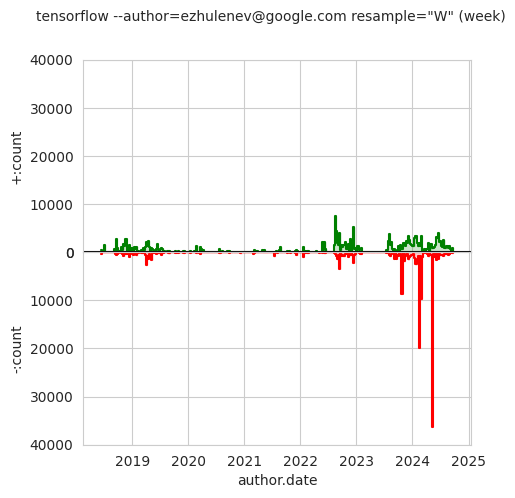

In [100]:
# https://stackoverflow.com/questions/62678411/how-to-plot-a-paired-histogram-using-seaborn
# https://stackoverflow.com/a/62678622/46058

sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(5,5))

for ax, column, color, invert in zip(axes.ravel(), ['+:count', '-:count'], ['green', 'red'], [False,True]):
    print(f"{column=}, {color=}, {invert=}")
    sns.lineplot(ax=ax, data=tf_resampled_W_df, 
                 x='author.date', y=column, 
                 color=color, drawstyle='steps-post')
    
    ax.fill_between(tf_resampled_W_df.index, tf_resampled_W_df[column],
                    alpha=0.2, color=color, step='post')
    ax.set_ylim(0, 40000)
    
    if invert:
        ax.invert_yaxis()
    else:
        ax.axhline(0, color="k")

fig.suptitle('tensorflow --author=ezhulenev@google.com resample="W" (week)', fontsize=10)
plt.subplots_adjust(hspace=0)

plt.show()

column='+:count', color='green', invert=False
column='-:count', color='red', invert=True


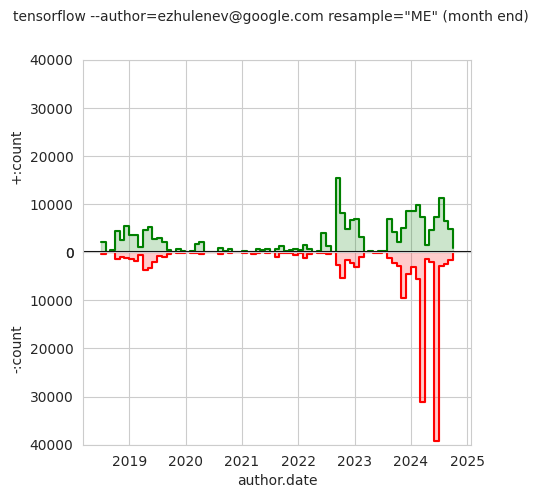

In [101]:
# https://stackoverflow.com/questions/62678411/how-to-plot-a-paired-histogram-using-seaborn
# https://stackoverflow.com/a/62678622/46058

sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(5,5))

for ax, column, color, invert in zip(axes.ravel(), ['+:count', '-:count'], ['green', 'red'], [False,True]):
    print(f"{column=}, {color=}, {invert=}")
    sns.lineplot(ax=ax, data=tf_resampled_ME_df, 
                 x='author.date', y=column, 
                 color=color, drawstyle='steps-post')
    
    ax.fill_between(tf_resampled_ME_df.index, tf_resampled_ME_df[column],
                    alpha=0.2, color=color, step='post')
    ax.set_ylim(0, 40000)
    
    if invert:
        ax.invert_yaxis()
    else:
        ax.axhline(0, color="k")

fig.suptitle('tensorflow --author=ezhulenev@google.com resample="ME" (month end)', fontsize=10)
plt.subplots_adjust(hspace=0)

plt.show()

column='+:count', color='green', invert=False
column='-:count', color='red', invert=True


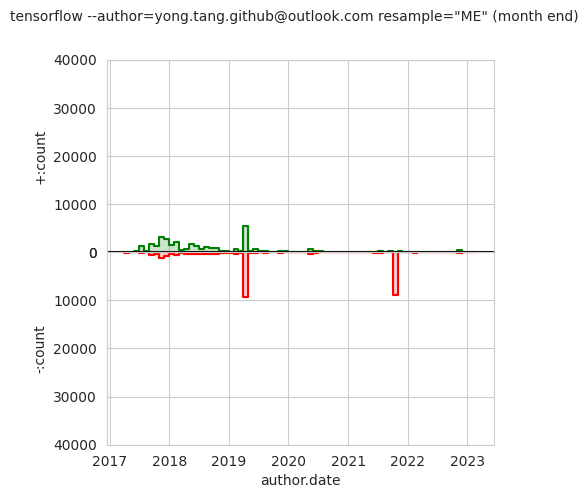

In [102]:
# https://stackoverflow.com/questions/62678411/how-to-plot-a-paired-histogram-using-seaborn
# https://stackoverflow.com/a/62678622/46058

sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(5,5))

for ax, column, color, invert in zip(axes.ravel(), ['+:count', '-:count'], ['green', 'red'], [False,True]):
    print(f"{column=}, {color=}, {invert=}")
    sns.lineplot(ax=ax, data=tf_yongtang_resampled_ME_df, 
                 x='author.date', y=column, 
                 color=color, drawstyle='steps-post')
    
    ax.fill_between(tf_yongtang_resampled_ME_df.index, tf_yongtang_resampled_ME_df[column],
                    alpha=0.2, color=color, step='post')
    ax.set_ylim(0, 40000)
    
    if invert:
        ax.invert_yaxis()
    else:
        ax.axhline(0, color="k")

fig.suptitle('tensorflow --author=yong.tang.github@outlook.com resample="ME" (month end)', fontsize=10)
plt.subplots_adjust(hspace=0)

plt.show()

In [103]:
print(f"ezhulenev index min={tf_resampled_ME_df.index[0]}")
print(f"ezhulenev index max={tf_resampled_ME_df.index[-1]}")
print("")
print(f"yong.tang index min={tf_yongtang_resampled_ME_df.index[0]}")
print(f"yong.tang index max={tf_yongtang_resampled_ME_df.index[-1]}")

ezhulenev index min=2018-06-30 00:00:00+00:00
ezhulenev index max=2024-09-30 00:00:00+00:00

yong.tang index min=2017-03-31 00:00:00+00:00
yong.tang index max=2023-02-28 00:00:00+00:00


In [104]:
import datetime

ezhulenev: column='+:count', color='green', invert=False
ezhulenev: column='-:count', color='red', invert=True
yong.tang: column='+:count', color='green', invert=False
yong.tang: column='-:count', color='red', invert=True


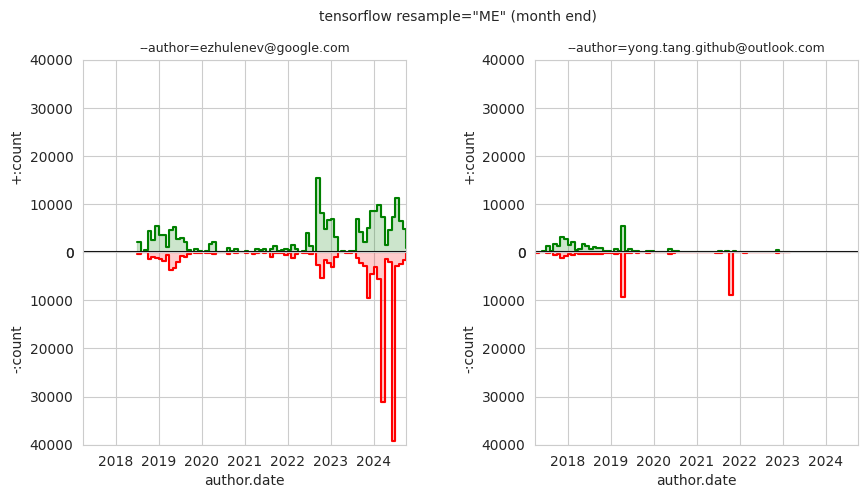

In [105]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=2, sharex='col', figsize=(10,5))

for ax, column, color, invert in zip(axes.T.ravel()[:2], ['+:count', '-:count'], ['green', 'red'], [False,True]):
    print(f"ezhulenev: {column=}, {color=}, {invert=}")
    sns.lineplot(ax=ax, data=tf_resampled_ME_df, 
                 x='author.date', y=column, 
                 color=color, drawstyle='steps-post')
    
    ax.fill_between(tf_resampled_ME_df.index, tf_resampled_ME_df[column],
                    alpha=0.2, color=color, step='post')
    ax.set_ylim(0, 40000)
    ax.set_xlim(datetime.date(2017, 3, 31), datetime.date(2024, 9, 30))
    
    if invert:
        ax.invert_yaxis()
    else:
        ax.set_title('--author=ezhulenev@google.com', fontsize=9)
        ax.axhline(0, color="k")

for ax, column, color, invert in zip(axes.T.ravel()[2:], ['+:count', '-:count'], ['green', 'red'], [False,True]):
    print(f"yong.tang: {column=}, {color=}, {invert=}")
    sns.lineplot(ax=ax, data=tf_yongtang_resampled_ME_df, 
                 x='author.date', y=column, 
                 color=color, drawstyle='steps-post')
    
    ax.fill_between(tf_yongtang_resampled_ME_df.index, tf_yongtang_resampled_ME_df[column],
                    alpha=0.2, color=color, step='post')
    ax.set_ylim(0, 40000)
    ax.set_xlim(datetime.date(2017, 3, 31), datetime.date(2024, 9, 30))
    
    if invert:
        ax.invert_yaxis()
    else:
        ax.set_title('--author=yong.tang.github@outlook.com', fontsize=9)
        ax.axhline(0, color="k")

fig.suptitle('tensorflow resample="ME" (month end)', fontsize=10)
plt.subplots_adjust(hspace=0, wspace=0.4)

plt.show()

In [106]:
tf_ezhulenev_resampled_ME_count_df = tf_ezhulenev_timeline_df.resample('ME', on='author.date')[['patch_id']].count()
tf_yongtang_resampled_ME_count_df  = tf_yongtang_timeline_df.resample('ME', on='author.date')[['patch_id']].count()
tf_ezhulenev_resampled_ME_count_df.head(5)

,patch_id
author.date,
2018-06-30 00:00:00+00:00,8
2018-07-31 00:00:00+00:00,2
2018-08-31 00:00:00+00:00,2
2018-09-30 00:00:00+00:00,18
2018-10-31 00:00:00+00:00,16


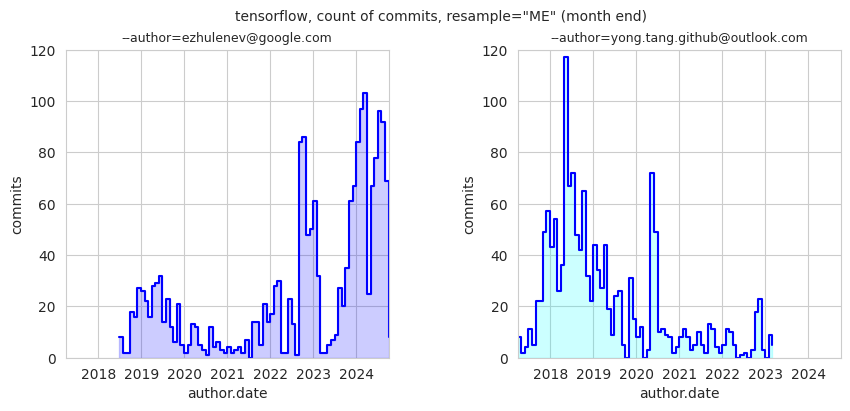

In [107]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=2, sharex='col', figsize=(10,4))

# -----------------------------------------------------------------------
ax=axes[0]
sns.lineplot(ax=ax, data=tf_ezhulenev_resampled_ME_count_df, 
             x='author.date', y='patch_id',
             color='blue', drawstyle='steps-post')
    
ax.fill_between(tf_ezhulenev_resampled_ME_count_df.index, tf_ezhulenev_resampled_ME_count_df['patch_id'],
                alpha=0.2, color='blue', step='post')
ax.set_ylim(0, 120)
ax.set_ylabel('commits')
ax.set_xlim(datetime.date(2017, 3, 31), datetime.date(2024, 9, 30))
ax.set_title('--author=ezhulenev@google.com', fontsize=9)

# -----------------------------------------------------------------------
ax=axes[1]
sns.lineplot(ax=ax, data=tf_yongtang_resampled_ME_count_df, 
             x='author.date', y='patch_id',
             color='blue', drawstyle='steps-post')
    
ax.fill_between(tf_yongtang_resampled_ME_count_df.index, tf_yongtang_resampled_ME_count_df['patch_id'],
                alpha=0.2, color='cyan', step='post')
ax.set_ylim(0, 120)
ax.set_ylabel('commits')
ax.set_xlim(datetime.date(2017, 3, 31), datetime.date(2024, 9, 30))
ax.set_title('--author=yong.tang.github@outlook.com', fontsize=9)

fig.suptitle('tensorflow, count of commits, resample="ME" (month end)', fontsize=10)
plt.subplots_adjust(wspace=0.4)
plt.show()

In [108]:
tf_ezhulenev_resampled_ME_median_df = tf_ezhulenev_timeline_df.fillna(0).resample('ME', on='author.date')[pm_count_cols].median()
tf_yongtang_resampled_ME_median_df  = tf_yongtang_timeline_df.fillna(0).resample('ME', on='author.date')[pm_count_cols].median()
tf_ezhulenev_resampled_ME_median_df.head(5)

,-:count,+:count,-:purpose.data,+:purpose.data,-:purpose.documentation,+:purpose.documentation,-:purpose.markup,+:purpose.markup,-:purpose.other,+:purpose.other,-:purpose.programming,+:purpose.programming,-:purpose.project,+:purpose.project,-:purpose.test,+:purpose.test,-:type.code,+:type.code,-:type.documentation,+:type.documentation
author.date,,,,,,,,,,,,,,,,,,,,
2018-06-30 00:00:00+00:00,11.5,196.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.5,131.0,0.0,0.0,0.0,57.0,9.5,146.0,1.0,50.5
2018-07-31 00:00:00+00:00,2.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,9.5,0.0,0.5,0.0,0.0,2.0,6.0,0.0,4.0
2018-08-31 00:00:00+00:00,7.0,271.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,107.0,0.0,12.5,7.0,152.0,0.5,150.0,6.5,121.5
2018-09-30 00:00:00+00:00,38.5,114.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,90.0,0.0,0.0,0.0,0.0,31.0,83.5,5.5,22.0
2018-10-31 00:00:00+00:00,15.5,77.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,26.5,0.0,1.0,3.5,49.5,12.5,64.5,4.5,12.5


ezhulenev: column='+:count', color='green', invert=False, ylim=(0, 300)
ezhulenev: column='-:count', color='red', invert=True, ylim=(0, 300)
yong.tang: column='+:count', color='green', invert=False, ylim=(0, 300)
yong.tang: column='-:count', color='red', invert=True, ylim=(0, 300)


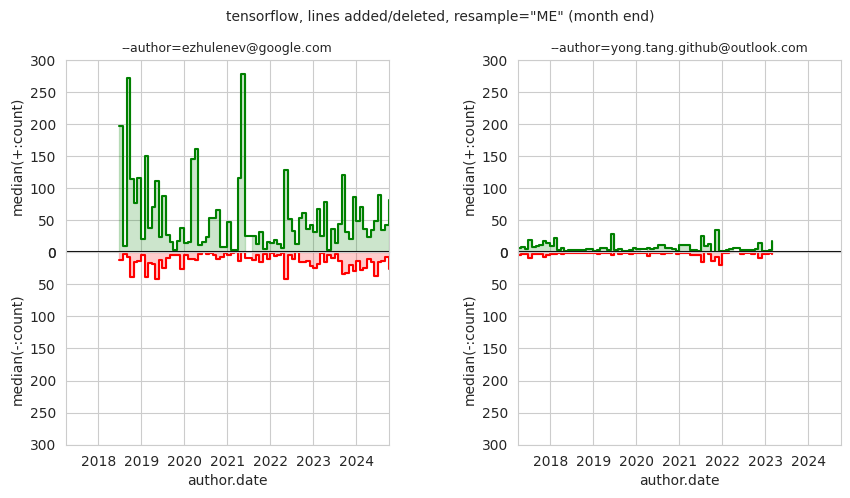

In [109]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=2, sharex='col', figsize=(10,5))
ymax=300
#ymax=50

df=tf_ezhulenev_resampled_ME_median_df
for ax, column, color, invert in zip(axes.T.ravel()[:2], ['+:count', '-:count'], ['green', 'red'], [False,True]):
    print(f"ezhulenev: {column=}, {color=}, {invert=}, ylim=(0, {ymax})")
    sns.lineplot(ax=ax, data=df, 
                 x='author.date', y=column, 
                 color=color, drawstyle='steps-post')
    
    ax.fill_between(df.index, df[column],
                    alpha=0.2, color=color, step='post')
    ax.set_ylim(0, ymax)
    ax.set_ylabel(f"median({column})")
    ax.set_xlim(datetime.date(2017, 3, 31), datetime.date(2024, 9, 30))
    
    if invert:
        ax.invert_yaxis()
    else:
        ax.set_title('--author=ezhulenev@google.com', fontsize=9)
        ax.axhline(0, color="k")

df=tf_yongtang_resampled_ME_median_df
for ax, column, color, invert in zip(axes.T.ravel()[2:], ['+:count', '-:count'], ['green', 'red'], [False,True]):
    print(f"yong.tang: {column=}, {color=}, {invert=}, ylim=(0, {ymax})")
    sns.lineplot(ax=ax, data=df, 
                 x='author.date', y=column, 
                 color=color, drawstyle='steps-post')
    
    ax.fill_between(df.index, df[column],
                    alpha=0.2, color=color, step='post')
    ax.set_ylim(0, ymax)
    ax.set_ylabel(f"median({column})")
    ax.set_xlim(datetime.date(2017, 3, 31), datetime.date(2024, 9, 30))
    
    if invert:
        ax.invert_yaxis()
    else:
        ax.set_title('--author=yong.tang.github@outlook.com', fontsize=9)
        ax.axhline(0, color="k")

fig.suptitle('tensorflow, lines added/deleted, resample="ME" (month end)', fontsize=10)
plt.subplots_adjust(hspace=0, wspace=0.4)

plt.show()

axes=array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)
axes.T.ravel()=array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)
column='+:type.code', color='green', invert=False
column='-:type.code', color='red', invert=True
column='+:type.documentation', color='green', invert=False
column='-:type.documentation', color='red', invert=True


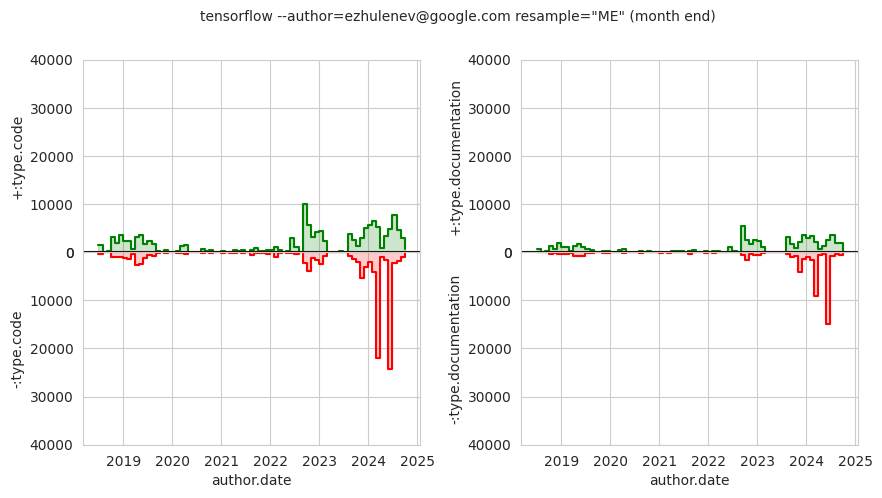

In [110]:
# https://stackoverflow.com/questions/62678411/how-to-plot-a-paired-histogram-using-seaborn
# https://stackoverflow.com/a/62678622/46058

sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=2, sharex='col', figsize=(10,5))

print(f"{axes=}")
print(f"{axes.T.ravel()=}")

for ax, column in zip(axes.T.ravel(), ['+:type.code', '-:type.code', '+:type.documentation', '-:type.documentation']):
    if column[0] == '+':
        invert = False
        color = 'green'
    else:
        invert = True
        color = 'red'

    print(f"{column=}, {color=}, {invert=}")
    sns.lineplot(ax=ax, data=tf_resampled_ME_df, 
                 x='author.date', y=column, 
                 color=color, drawstyle='steps-post')
    
    ax.fill_between(tf_resampled_ME_df.index, tf_resampled_ME_df[column],
                    alpha=0.2, color=color, step='post')
    ax.set_ylim(0, 40000)
    
    if invert:
        ax.invert_yaxis()
    else:
        ax.axhline(0, color="k")

fig.suptitle('tensorflow --author=ezhulenev@google.com resample="ME" (month end)', fontsize=10)
plt.subplots_adjust(hspace=0, wspace=0.3)

plt.show()

axes=array([<Axes: >, <Axes: >], dtype=object)
axes.ravel()=array([<Axes: >, <Axes: >], dtype=object)
column='+:type.code', color='green', invert=False
column='-:type.code', color='red', invert=True
column='+:type.documentation', color='cyan', invert=False
column='-:type.documentation', color='orange', invert=True


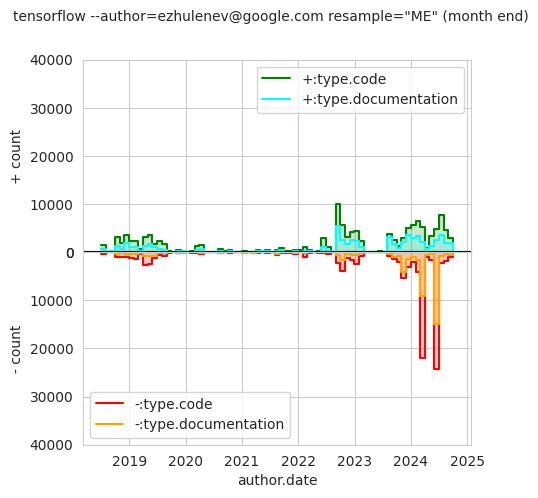

In [111]:
# https://stackoverflow.com/questions/62678411/how-to-plot-a-paired-histogram-using-seaborn
# https://stackoverflow.com/a/62678622/46058

sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=1, sharex='col', figsize=(5,5))

print(f"{axes=}")
print(f"{axes.ravel()=}")

for ax, column, color in zip(list(axes.ravel()) * 2,
                             ['+:type.code', '-:type.code', '+:type.documentation', '-:type.documentation'],
                             ['green', 'red', 'cyan', 'orange']):
    if column[0] == '+':
        invert = False
        ax.set_ylabel('+ count')
    else:
        invert = True
        ax.set_ylabel('- count')

    print(f"{column=}, {color=}, {invert=}")
    sns.lineplot(ax=ax, data=tf_resampled_ME_df, 
                 x='author.date', y=column, label=column,
                 color=color, drawstyle='steps-post')
    
    ax.fill_between(tf_resampled_ME_df.index, tf_resampled_ME_df[column],
                    alpha=0.2, color=color, step='post')
    ax.set_ylim(0, 40000)
    
    if invert:
        ax.invert_yaxis()
    else:
        ax.axhline(0, color="k")

fig.suptitle('tensorflow --author=ezhulenev@google.com resample="ME" (month end)', fontsize=10)
plt.subplots_adjust(hspace=0, wspace=0.3)

plt.show()

In [112]:
tf_resampled_ME_df['+:type.code [%]'] = tf_resampled_ME_df['+:type.code']/tf_resampled_ME_df['+:count']
tf_resampled_ME_df['-:type.code [%]'] = tf_resampled_ME_df['-:type.code']/tf_resampled_ME_df['-:count']
tf_resampled_ME_df['+:type.documentation [%]'] = tf_resampled_ME_df['+:type.documentation']/tf_resampled_ME_df['+:count']
tf_resampled_ME_df['-:type.documentation [%]'] = tf_resampled_ME_df['-:type.documentation']/tf_resampled_ME_df['-:count']

tf_resampled_ME_df[['-:type.code [%]', '-:type.documentation [%]', '+:type.code [%]', '+:type.documentation [%]']]

,-:type.code [%],-:type.documentation [%],+:type.code [%],+:type.documentation [%]
author.date,,,,
2018-06-30 00:00:00+00:00,0.845304,0.154696,0.689889,0.310111
2018-07-31 00:00:00+00:00,1.000000,0.000000,0.600000,0.400000
2018-08-31 00:00:00+00:00,0.071429,0.928571,0.552486,0.447514
2018-09-30 00:00:00+00:00,0.791636,0.208364,0.722582,0.277418
2018-10-31 00:00:00+00:00,0.868979,0.131021,0.726168,0.273832
...,...,...,...,...
2024-05-31 00:00:00+00:00,0.618904,0.381096,0.655191,0.344809
2024-06-30 00:00:00+00:00,0.745792,0.254208,0.679443,0.320557
2024-07-31 00:00:00+00:00,0.806885,0.193115,0.701520,0.298480


In [113]:
tf_yongtang_resampled_ME_df['+:type.code [%]'] = tf_yongtang_resampled_ME_df['+:type.code']/tf_yongtang_resampled_ME_df['+:count']
tf_yongtang_resampled_ME_df['-:type.code [%]'] = tf_yongtang_resampled_ME_df['-:type.code']/tf_yongtang_resampled_ME_df['-:count']
tf_yongtang_resampled_ME_df['+:type.documentation [%]'] = tf_yongtang_resampled_ME_df['+:type.documentation']/tf_yongtang_resampled_ME_df['+:count']
tf_yongtang_resampled_ME_df['-:type.documentation [%]'] = tf_yongtang_resampled_ME_df['-:type.documentation']/tf_yongtang_resampled_ME_df['-:count']

tf_yongtang_resampled_ME_df[['-:type.code [%]', '-:type.documentation [%]', '+:type.code [%]', '+:type.documentation [%]']]

,-:type.code [%],-:type.documentation [%],+:type.code [%],+:type.documentation [%]
author.date,,,,
2017-03-31 00:00:00+00:00,0.675000,0.325000,0.696078,0.303922
2017-04-30 00:00:00+00:00,0.714286,0.285714,0.875000,0.125000
2017-05-31 00:00:00+00:00,0.900000,0.100000,0.902344,0.097656
2017-06-30 00:00:00+00:00,0.705882,0.294118,0.802075,0.197925
2017-07-31 00:00:00+00:00,0.750000,0.250000,0.869110,0.130890
...,...,...,...,...
2022-10-31 00:00:00+00:00,0.987654,0.012346,0.990566,0.009434
2022-11-30 00:00:00+00:00,1.000000,0.000000,1.000000,0.000000
2022-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN


In [114]:
tf_resampled_ME_df[['-:type.code [%]', '-:type.documentation [%]', '+:type.code [%]', '+:type.documentation [%]']].describe()

,-:type.code [%],-:type.documentation [%],+:type.code [%],+:type.documentation [%]
count,73.000000,73.000000,75.000000,75.000000
mean,0.769058,0.230942,0.653978,0.346022
std,0.161580,0.161580,0.127854,0.127854
min,0.071429,0.000000,0.000000,0.174129
25%,0.705086,0.131021,0.628349,0.277466
50%,0.766807,0.233193,0.676998,0.323002
75%,0.868979,0.294914,0.722534,0.371651
max,1.000000,0.928571,0.825871,1.000000


In [115]:
tf_yongtang_resampled_ME_df[['-:type.code [%]', '-:type.documentation [%]', '+:type.code [%]', '+:type.documentation [%]']].describe()

,-:type.code [%],-:type.documentation [%],+:type.code [%],+:type.documentation [%]
count,65.000000,65.000000,67.000000,67.000000
mean,0.855523,0.144477,0.857276,0.142724
std,0.171148,0.171148,0.112140,0.112140
min,0.000000,0.000000,0.350000,0.000000
25%,0.800000,0.037677,0.803993,0.074553
50%,0.902439,0.097561,0.861111,0.138889
75%,0.962323,0.200000,0.925447,0.196007
max,1.000000,1.000000,1.000000,0.650000


column='+:type.code [%]', color='olive', invert=False
column='-:type.code [%]', color='orangered', invert=True


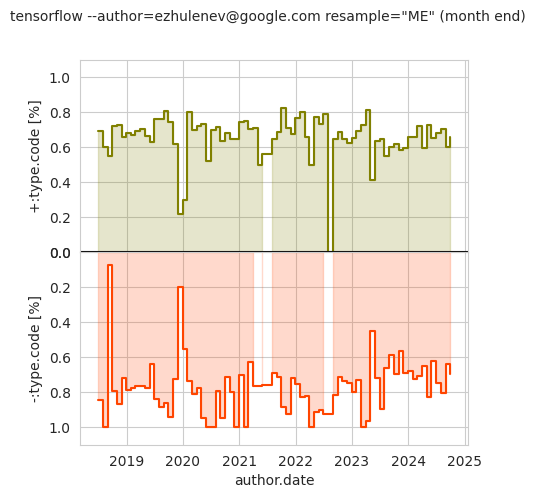

In [116]:
# https://stackoverflow.com/questions/62678411/how-to-plot-a-paired-histogram-using-seaborn
# https://stackoverflow.com/a/62678622/46058

sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(5,5))

for ax, column, color, invert in zip(axes.ravel(), ['+:type.code [%]', '-:type.code [%]'], ['olive', 'orangered'], [False,True]):
    print(f"{column=}, {color=}, {invert=}")
    sns.lineplot(ax=ax, data=tf_resampled_ME_df, 
                 x='author.date', y=column, 
                 color=color, drawstyle='steps-post')
    
    ax.fill_between(tf_resampled_ME_df.index, tf_resampled_ME_df[column],
                    alpha=0.2, color=color, step='post')
    ax.set_ylim(0.0, 1.1)
    
    if invert:
        ax.invert_yaxis()
    else:
        ax.axhline(0, color="k")

fig.suptitle('tensorflow --author=ezhulenev@google.com resample="ME" (month end)', fontsize=10)
plt.subplots_adjust(hspace=0)

plt.show()

column='+:type.code [%]', color='olive', invert=False
column='-:type.code [%]', color='orangered', invert=True


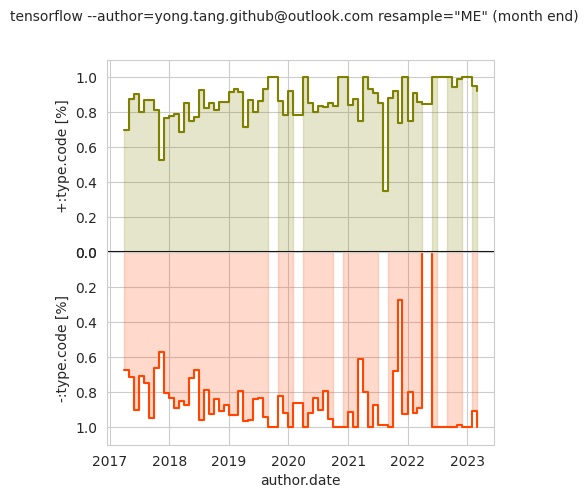

In [117]:
# https://stackoverflow.com/questions/62678411/how-to-plot-a-paired-histogram-using-seaborn
# https://stackoverflow.com/a/62678622/46058

sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(5,5))

for ax, column, color, invert in zip(axes.ravel(), ['+:type.code [%]', '-:type.code [%]'], ['olive', 'orangered'], [False,True]):
    print(f"{column=}, {color=}, {invert=}")
    sns.lineplot(ax=ax, data=tf_yongtang_resampled_ME_df, 
                 x='author.date', y=column, 
                 color=color, drawstyle='steps-post')
    
    ax.fill_between(tf_yongtang_resampled_ME_df.index, tf_yongtang_resampled_ME_df[column],
                    alpha=0.2, color=color, step='post')
    ax.set_ylim(0.0, 1.1)
    
    if invert:
        ax.invert_yaxis()
    else:
        ax.axhline(0, color="k")

fig.suptitle('tensorflow --author=yong.tang.github@outlook.com resample="ME" (month end)', fontsize=10)
plt.subplots_adjust(hspace=0)

plt.show()

In [118]:
[col for col in pm_count_cols if col.startswith('+:type.')]

['+:type.code', '+:type.documentation']

In [119]:
[col for col in pm_count_cols if col.startswith('+:purpose.')]

['+:purpose.data',
 '+:purpose.documentation',
 '+:purpose.markup',
 '+:purpose.other',
 '+:purpose.programming',
 '+:purpose.project',
 '+:purpose.test']

#### File purpose to line type, resampled

In [120]:
!ls /home/jnareb/example_annotations/*.json

/home/jnareb/example_annotations/tensorflow.lines-stats.json
/home/jnareb/example_annotations/tensorflow.purpose-per-file.json
/home/jnareb/example_annotations/tensorflow.timeline.json
/home/jnareb/example_annotations/tensorflow.timeline.purpose-to-type.json


In [121]:
%ls /home/jnareb/example_annotations/*.json

/home/jnareb/example_annotations/tensorflow.lines-stats.json
/home/jnareb/example_annotations/tensorflow.purpose-per-file.json
/home/jnareb/example_annotations/tensorflow.timeline.json
/home/jnareb/example_annotations/tensorflow.timeline.purpose-to-type.json


In [122]:
%pwd

'/home/jnareb/python-diff-annotator/notebooks'

In [123]:
%ls '../data/examples/stats/'

ls: cannot access '../data/examples/stats/': No such file or directory


-----

The statistics in `'tensorflow.timeline.purpose-to-type.json'` file were generated with the following command:

```commandline
diff-gather-stats \
    --annotations-dir='' \
    timeline \
    --purpose-to-annotation=data \
    --purpose-to-annotation=documentation \
    --purpose-to-annotation=markup \
    --purpose-to-annotation=other \
    --purpose-to-annotation=project \
    --purpose-to-annotation=test \
    ~/example_annotations/tensorflow.timeline.purpose-to-type.json \
    ~/example_annotations/tensorflow/
```

In [124]:
annotations_path = '/home/jnareb/example_annotations'

with open(f'{annotations_path}/tensorflow.timeline.purpose-to-type.json', mode='r') as json_fp:
    tf_timeline_purposes_data = json.load(json_fp)

In [125]:
tf_timeline_purposes_data.keys()

dict_keys(['tensorflow'])

In [126]:
tf_timeline_purposes_data['tensorflow'][2]

{'bug_id': 'ezhulenev',
 'patch_id': '286e7d4b24b4235ca71027b1a68d5619e1c70d8a.json',
 'file_names': 6,
 'language:Starlark': 1,
 'type:programming': 5,
 'purpose:project': 1,
 '+:count': 41,
 '+:type.project': 5,
 '+:purpose.project': 5,
 '-:count': 365,
 '-:type.project': 38,
 '-:purpose.project': 38,
 'language:C++': 2,
 'purpose:programming': 4,
 '+:type.documentation': 34,
 '+:purpose.programming': 36,
 '-:type.documentation': 166,
 '-:purpose.programming': 327,
 '-:type.code': 161,
 'language:C': 2,
 '+:type.code': 2,
 'language:/dev/null': 1,
 'type:other': 1,
 'purpose:other': 1,
 'author.timestamp': 1717176144,
 'author.tz_info': '-0700',
 'author.name': 'Eugene Zhulenev',
 'author.email': 'ezhulenev@google.com',
 'committer.timestamp': 1717177898,
 'committer.tz_info': '-0700',
 'committer.name': 'TensorFlower Gardener',
 'committer.email': 'gardener@tensorflow.org',
 'n_parents': 1}

In [127]:
tf_timeline_purposes_df = pd.DataFrame.from_records(tf_timeline_purposes_data['tensorflow'])
tf_timeline_purposes_df

,bug_id,patch_id,file_names,language:Starlark,type:programming,purpose:programming,+:count,+:type.code,+:purpose.programming,-:count,...,-:purpose.markup,language:Cython,language:Ignore List,language:Shell,language:Java,language:Assembly,language:Go,language:CODEOWNERS,language:Dockerfile,language:Maven POM
0,ezhulenev,185a326927da6e1d5ca8dbb8506d4d353780bd2e.json,1.0,1.0,1.0,1.0,4.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ezhulenev,cdd37b886e0ac509320fc7391f9f1ac922c06454.json,3.0,1.0,2.0,NaN,137.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ezhulenev,286e7d4b24b4235ca71027b1a68d5619e1c70d8a.json,6.0,1.0,5.0,4.0,41.0,2.0,36.0,365.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ezhulenev,16d1692abf45b88b4bc7ee7f1b11fdde10af8c69.json,13.0,5.0,10.0,4.0,651.0,27.0,67.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ezhulenev,4ec3af25a993f29a5b340bc4d577cc6ee115cf02.json,2.0,1.0,2.0,1.0,120.0,92.0,119.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3339,yong.tang,44e88008ad4b5704357816b726ff86cf7d2e4dd3.json,1.0,NaN,1.0,1.0,3.0,3.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3340,yong.tang,efdc23321b8038d2dfc3ac4da058b00de3c15059.json,4.0,NaN,4.0,NaN,17.0,NaN,NaN,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3341,yong.tang,8e3b32d37ce22c07c21f508b2835456f3ca97531.json,1.0,NaN,1.0,1.0,5.0,3.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3342,yong.tang,fde6610772a2034a043332acb4b634a8796151fa.json,4.0,NaN,4.0,4.0,10.0,7.0,10.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
tf_ezhulenev_timeline_purposes_df = tf_timeline_purposes_df[tf_timeline_purposes_df['bug_id'] == 'ezhulenev'].drop(columns=['bug_id'])
tf_yongtang_timeline_purposes_df  = tf_timeline_purposes_df[tf_timeline_purposes_df['bug_id'] == 'yong.tang'].drop(columns=['bug_id'])
tf_ezhulenev_timeline_purposes_df.head(5)

,patch_id,file_names,language:Starlark,type:programming,purpose:programming,+:count,+:type.code,+:purpose.programming,-:count,-:type.code,...,-:purpose.markup,language:Cython,language:Ignore List,language:Shell,language:Java,language:Assembly,language:Go,language:CODEOWNERS,language:Dockerfile,language:Maven POM
0,185a326927da6e1d5ca8dbb8506d4d353780bd2e.json,1.0,1.0,1.0,1.0,4.0,4.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,cdd37b886e0ac509320fc7391f9f1ac922c06454.json,3.0,1.0,2.0,NaN,137.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,286e7d4b24b4235ca71027b1a68d5619e1c70d8a.json,6.0,1.0,5.0,4.0,41.0,2.0,36.0,365.0,161.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16d1692abf45b88b4bc7ee7f1b11fdde10af8c69.json,13.0,5.0,10.0,4.0,651.0,27.0,67.0,20.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4ec3af25a993f29a5b340bc4d577cc6ee115cf02.json,2.0,1.0,2.0,1.0,120.0,92.0,119.0,83.0,62.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
pm_count_purposes_cols = [col for col in tf_ezhulenev_timeline_purposes_df.columns if col.startswith('+:') or col.startswith('-:')]
pm_count_purposes_cols.sort(key=lambda s: s[2:]+('0' if s[0] == '-' else '1'))
pm_count_purposes_cols

['-:count',
 '+:count',
 '-:purpose.data',
 '+:purpose.data',
 '-:purpose.documentation',
 '+:purpose.documentation',
 '-:purpose.markup',
 '+:purpose.markup',
 '-:purpose.other',
 '+:purpose.other',
 '-:purpose.programming',
 '+:purpose.programming',
 '-:purpose.project',
 '+:purpose.project',
 '-:purpose.test',
 '+:purpose.test',
 '-:type.code',
 '+:type.code',
 '-:type.data',
 '+:type.data',
 '-:type.documentation',
 '+:type.documentation',
 '-:type.markup',
 '+:type.markup',
 '-:type.other',
 '+:type.other',
 '-:type.project',
 '+:type.project',
 '-:type.test',
 '+:type.test']

In [130]:
# just in case, if there are any problems with timestamp fields
tf_ezhulenev_timeline_purposes_df.dropna(inplace=True, subset=['author.timestamp', 'committer.timestamp'], how='any')
tf_yongtang_timeline_purposes_df.dropna(inplace=True, subset=['author.timestamp', 'committer.timestamp'], how='any')

In [131]:
tf_ezhulenev_timeline_purposes_df['author.date'] = tf_ezhulenev_timeline_purposes_df[['author.timestamp', 'author.tz_info']].apply(
    lambda x: pd.Timestamp.fromtimestamp(x['author.timestamp'], tz='UTC'),
axis='columns').astype('datetime64[ns, UTC]')

tf_ezhulenev_timeline_purposes_df['committer.date'] = tf_ezhulenev_timeline_purposes_df[['committer.timestamp', 'committer.tz_info']].apply(
    lambda x: pd.Timestamp.fromtimestamp(x['committer.timestamp'], tz='UTC'),
axis='columns').astype('datetime64[ns, UTC]')

# ---------------------------------------------------------------------------------------------------------------------------

tf_yongtang_timeline_purposes_df['author.date'] = tf_yongtang_timeline_purposes_df[['author.timestamp']].apply(
    lambda x: pd.Timestamp.fromtimestamp(x['author.timestamp'], tz='UTC'),
axis='columns').astype('datetime64[ns, UTC]')

tf_yongtang_timeline_purposes_df['committer.date'] = tf_yongtang_timeline_purposes_df[['committer.timestamp']].apply(
    lambda x: pd.Timestamp.fromtimestamp(x['committer.timestamp'], tz='UTC'),
axis='columns').astype('datetime64[ns, UTC]')

In [132]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
tf_ezhulenev_purposes_resampled_ME_df = tf_ezhulenev_timeline_purposes_df.resample('ME', on='author.date')[pm_count_purposes_cols].sum()
tf_yongtang_purposes_resampled_ME_df  = tf_yongtang_timeline_purposes_df.resample('ME', on='author.date')[pm_count_purposes_cols].sum()
tf_ezhulenev_purposes_resampled_ME_df.head(5)

,-:count,+:count,-:purpose.data,+:purpose.data,-:purpose.documentation,+:purpose.documentation,-:purpose.markup,+:purpose.markup,-:purpose.other,+:purpose.other,...,-:type.documentation,+:type.documentation,-:type.markup,+:type.markup,-:type.other,+:type.other,-:type.project,+:type.project,-:type.test,+:type.test
author.date,,,,,,,,,,,,,,,,,,,,,
2018-06-30 00:00:00+00:00,362.0,2067.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52.0,420.0,0.0,0.0,0.0,0.0,0.0,71.0,77.0,582.0
2018-07-31 00:00:00+00:00,4.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2018-08-31 00:00:00+00:00,14.0,543.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,66.0,0.0,0.0,0.0,0.0,0.0,25.0,14.0,304.0
2018-09-30 00:00:00+00:00,1363.0,4322.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,282.0,937.0,0.0,0.0,0.0,0.0,0.0,21.0,35.0,579.0
2018-10-31 00:00:00+00:00,1038.0,2633.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,118.0,461.0,0.0,0.0,0.0,0.0,6.0,25.0,338.0,1136.0


In [133]:
cols = [f"{pm}:type.{type}" for type in ['code', 'documentation', 'test', 'other'] for pm in ['+', '-']]
cols

['+:type.code',
 '-:type.code',
 '+:type.documentation',
 '-:type.documentation',
 '+:type.test',
 '-:type.test',
 '+:type.other',
 '-:type.other']

cols=['+:type.code', '-:type.code', '+:type.documentation', '-:type.documentation', '+:type.test', '-:type.test', '+:type.other', '-:type.other']
axes=array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)
axes.T.ravel()=array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)
column='+:type.code', color='green', invert=False
column='-:type.code', color='red', invert=True
column='+:type.documentation', color='green', invert=False
column='-:type.documentation', color='red', invert=True
column='+:type.test', color='green', invert=False
column='-:type.test', color='red', invert=True
column='+:type.other', color='green', invert=False
column='-:type.other', color='red', invert=True


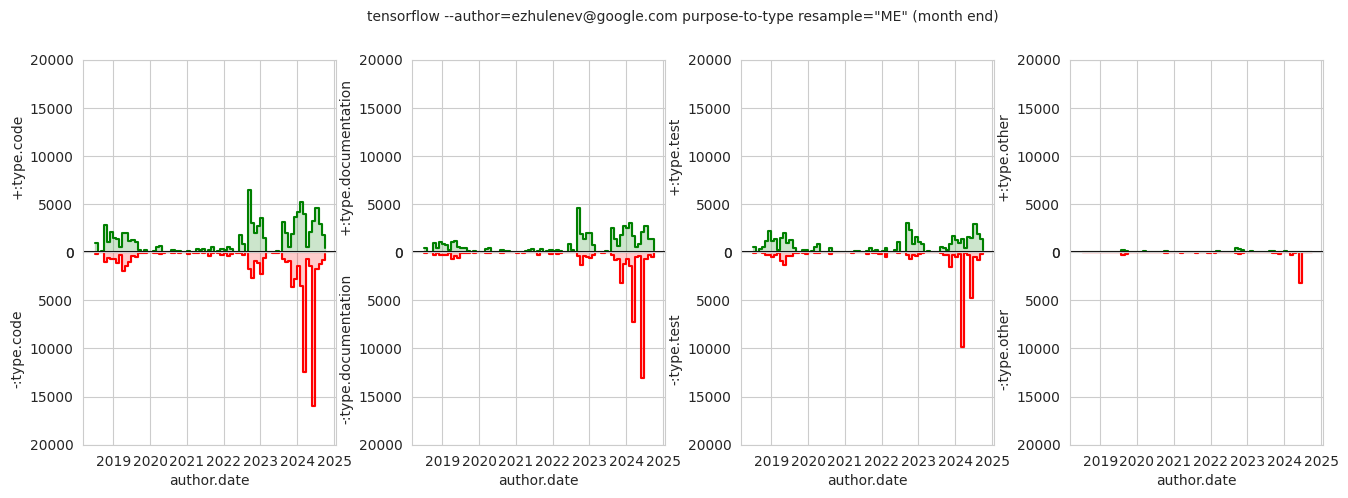

In [134]:
# https://stackoverflow.com/questions/62678411/how-to-plot-a-paired-histogram-using-seaborn
# https://stackoverflow.com/a/62678622/46058

cols = [f"{pm}:type.{type}" for type in ['code', 'documentation', 'test', 'other'] for pm in ['+', '-']]
print(f"{cols=}")
ncols = int(len(cols)/2)

sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=ncols, sharex='col', figsize=(ncols*4,5))

print(f"{axes=}")
print(f"{axes.T.ravel()=}")

df=tf_ezhulenev_purposes_resampled_ME_df

for ax, column in zip(axes.T.ravel(), cols):
    if column[0] == '+':
        invert = False
        color = 'green'
    else:
        invert = True
        color = 'red'

    print(f"{column=}, {color=}, {invert=}")
    sns.lineplot(ax=ax, data=df, 
                 x='author.date', y=column, 
                 color=color, drawstyle='steps-post')
    
    ax.fill_between(df.index, df[column],
                    alpha=0.2, color=color, step='post')
    ax.set_ylim(0, 20000)
    
    if invert:
        ax.invert_yaxis()
    else:
        ax.axhline(0, color="k")

fig.suptitle('tensorflow --author=ezhulenev@google.com purpose-to-type resample="ME" (month end)', fontsize=10)
plt.subplots_adjust(hspace=0, wspace=0.3)

plt.show()

In [135]:
cols_plus = [f"+:type.{type}" for type in ['code', 'documentation', 'test', 'other', 'data', 'markup', 'project']]
cols_minus = [f"-:type.{type}" for type in ['code', 'documentation', 'test', 'other', 'data', 'markup', 'project']]

In [136]:
df=tf_ezhulenev_purposes_resampled_ME_df

for c in cols_plus:
    df[f'{c} [%]'] = df[f'{c}']/tf_resampled_ME_df['+:count']

for c in cols_minus:
    df[f'{c} [%]'] = df[f'{c}']/tf_resampled_ME_df['-:count']

In [137]:
cols_plus = [f"+:type.{type}" for type in ['code', 'documentation', 'test', 'other']]
cols_minus = [f"-:type.{type}" for type in ['code', 'documentation', 'test', 'other']]

In [138]:
cols_perc = [f"{pm}:type.{type} [%]" for type in ['code', 'documentation', 'test', 'other'] for pm in ['+', '-']]
cols_perc

['+:type.code [%]',
 '-:type.code [%]',
 '+:type.documentation [%]',
 '-:type.documentation [%]',
 '+:type.test [%]',
 '-:type.test [%]',
 '+:type.other [%]',
 '-:type.other [%]']

In [139]:
tf_ezhulenev_purposes_resampled_ME_df[cols_perc].head(5)

,+:type.code [%],-:type.code [%],+:type.documentation [%],-:type.documentation [%],+:type.test [%],-:type.test [%],+:type.other [%],-:type.other [%]
author.date,,,,,,,,
2018-06-30 00:00:00+00:00,0.480890,0.643646,0.203193,0.143646,0.281567,0.212707,0.0,0.0
2018-07-31 00:00:00+00:00,0.550000,1.000000,0.400000,0.000000,0.000000,0.000000,0.0,0.0
2018-08-31 00:00:00+00:00,0.272560,0.000000,0.121547,0.000000,0.559853,1.000000,0.0,0.0
2018-09-30 00:00:00+00:00,0.644378,0.767425,0.216798,0.206897,0.133966,0.025679,0.0,0.0
2018-10-31 00:00:00+00:00,0.383973,0.554913,0.175085,0.113680,0.431447,0.325626,0.0,0.0


cols=['+:type.code', '-:type.code', '+:type.documentation', '-:type.documentation', '+:type.test', '-:type.test', '+:type.other', '-:type.other']
axes=array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)
axes.T.ravel()=array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)
column='+:type.code [%]', color='green', invert=False
column='-:type.code [%]', color='red', invert=True
column='+:type.documentation [%]', color='green', invert=False
column='-:type.documentation [%]', color='red', invert=True
column='+:type.test [%]', color='green', invert=False
column='-:type.test [%]', color='red', invert=True
column='+:type.other [%]', color='green', invert=False
column='-:type.other [%]', color='red', invert=True


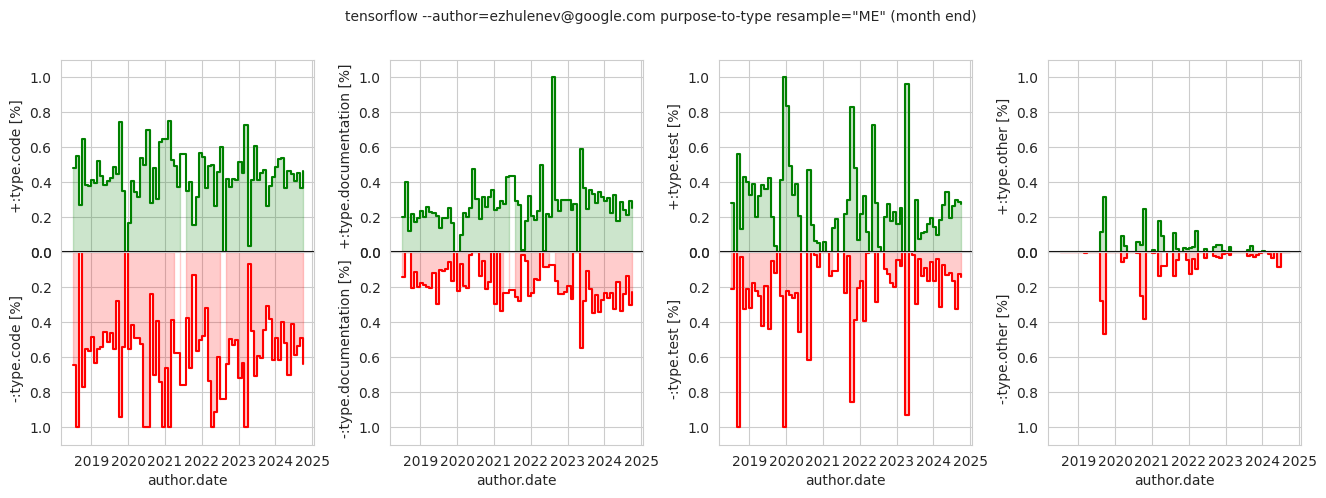

In [140]:
# https://stackoverflow.com/questions/62678411/how-to-plot-a-paired-histogram-using-seaborn
# https://stackoverflow.com/a/62678622/46058

print(f"{cols=}")
ncols = int(len(cols_perc)/2)

sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=ncols, sharex='col', figsize=(ncols*4,5))

print(f"{axes=}")
print(f"{axes.T.ravel()=}")

df=tf_ezhulenev_purposes_resampled_ME_df

for ax, column in zip(axes.T.ravel(), cols_perc):
    if column[0] == '+':
        invert = False
        color = 'green'
    else:
        invert = True
        color = 'red'

    print(f"{column=}, {color=}, {invert=}")
    sns.lineplot(ax=ax, data=df, 
                 x='author.date', y=column, 
                 color=color, drawstyle='steps-post')
    
    ax.fill_between(df.index, df[column],
                    alpha=0.2, color=color, step='post')
    ax.set_ylim(0.0, 1.1)
    
    if invert:
        ax.invert_yaxis()
    else:
        ax.axhline(0, color="k")

fig.suptitle('tensorflow --author=ezhulenev@google.com purpose-to-type resample="ME" (month end)', fontsize=10)
plt.subplots_adjust(hspace=0, wspace=0.3)

plt.show()

In [141]:
cols_perc_plus_all = [col for col in df.columns if col.startswith('+') and col.endswith('[%]')]
cols_perc_minus_all = [col for col in df.columns if col.startswith('-') and col.endswith('[%]')]

cols_perc_plus_all

['+:type.code [%]',
 '+:type.documentation [%]',
 '+:type.test [%]',
 '+:type.other [%]',
 '+:type.data [%]',
 '+:type.markup [%]',
 '+:type.project [%]']

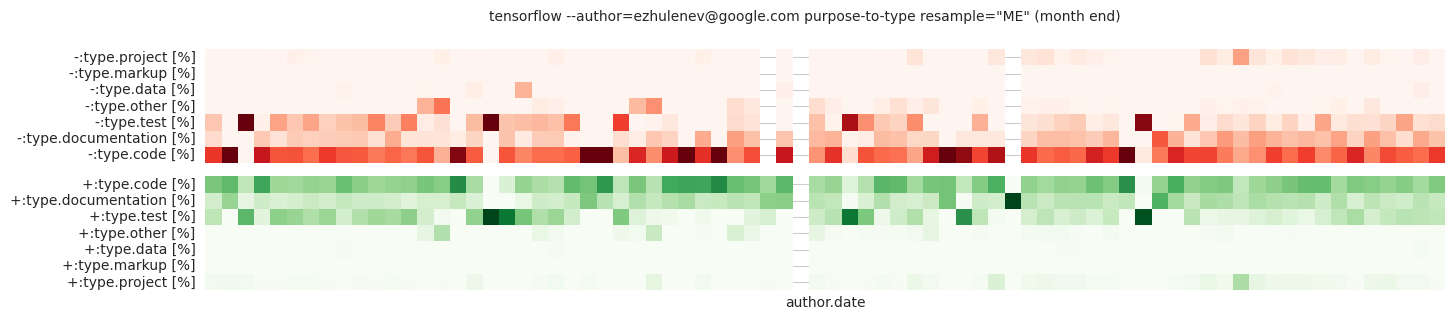

In [142]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex='col', figsize=(16,3.3))
sns.heatmap(df[cols_perc_plus_all].transpose(), square=True, cmap='Greens', vmin=0, vmax=1.0,
            xticklabels=False, cbar=False,
            ax=axes[1])
axes[0].get_xaxis().set_visible(False)

sns.heatmap(df[reversed(cols_perc_minus_all)].transpose(), square=True, cmap='Reds', vmin=0, vmax=1.0,
            xticklabels=False, cbar=False,
            ax=axes[0])

fig.suptitle('tensorflow --author=ezhulenev@google.com purpose-to-type resample="ME" (month end)', fontsize=10)

plt.subplots_adjust(hspace=0)
plt.show()

In [143]:
cols_plus_all  = [f"+:type.{type}" for type in ['code', 'documentation', 'test', 'other', 'data', 'markup', 'project']]
cols_minus_all = [f"-:type.{type}" for type in ['code', 'documentation', 'test', 'other', 'data', 'markup', 'project']]

In [144]:
from matplotlib.colors import LogNorm, Normalize

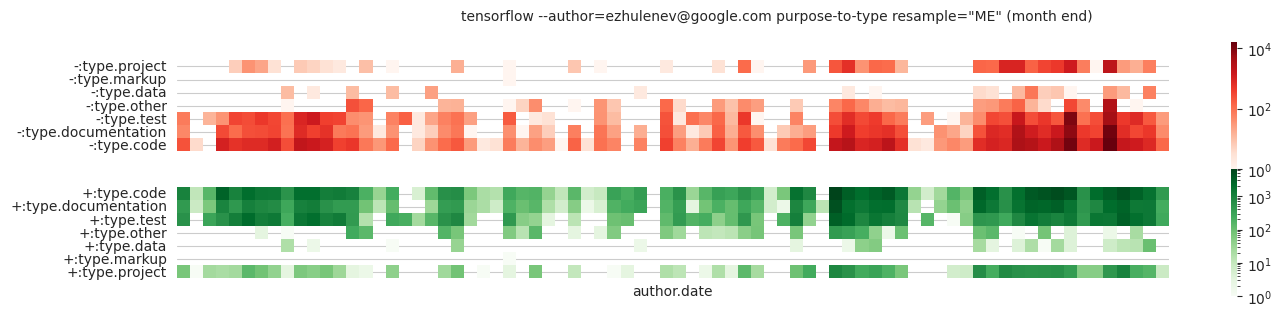

In [145]:
#https://stackoverflow.com/questions/36898008/seaborn-heatmap-with-logarithmic-scale-colorbar
fig, axes = plt.subplots(nrows=2, ncols=1, sharex='col', figsize=(16,3.3))
sns.heatmap(df[cols_plus_all].transpose(),
            square=True, cmap='Greens', vmin=0, vmax=15000,
            xticklabels=False, norm=LogNorm(),
            ax=axes[1])
axes[0].get_xaxis().set_visible(False)

sns.heatmap(df[reversed(cols_minus_all)].transpose(),
            square=True, cmap='Reds', vmin=0, vmax=15000,
            xticklabels=False, norm=LogNorm(),
            ax=axes[0])

fig.suptitle('tensorflow --author=ezhulenev@google.com purpose-to-type resample="ME" (month end)', fontsize=10)

plt.subplots_adjust(hspace=0)
plt.show()